**Importing Required Libraries**

**import pandas as pd**
loads the Pandas library, which is used for data loading, cleaning, transformation, and analysis.

**import matplotlib.pyplot as plt**
loads Matplotlib’s plotting interface, which is used to create graphs, trends, and visualizations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Step 1: Loading the Dataset**

We use **pd.read_csv()** to read the CSV file from Google Drive.

The file is loaded into a DataFrame named dataframe1, which acts like a table where each column represents a variable such as temperature, humidity, or power consumption in different zones.

Displaying **dataframe1** shows the full dataset so we can confirm that the file is loaded correctly and check the overall structure before cleaning or analysis.

In [ ]:
# Step 1: Load CSV file
dataframe1 = pd.read_csv("/content/drive/MyDrive/powerconsumption.csv")

# Display the dataset
dataframe1

Datetime  Temperature  Humidity  WindSpeed  \
0      2017-01-01 00:00:00        6.559      73.8      0.083   
1      2017-01-01 00:10:00        6.414      74.5      0.083   
2      2017-01-01 00:20:00        6.313      74.5      0.080   
3      2017-01-01 00:30:00        6.121      75.0      0.083   
4      2017-01-01 00:40:00        5.921      75.7      0.081   
...                    ...          ...       ...        ...   
52411  2017-12-30 23:10:00        7.010      72.4      0.080   
52412  2017-12-30 23:20:00        6.947      72.6      0.082   
52413  2017-12-30 23:30:00        6.900      72.8      0.086   
52414  2017-12-30 23:40:00        6.758      73.0      0.080   
52415  2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

**Step 2: Basic Data Understanding**

**dataframe1.head()**

Shows the first 5 rows of the dataset.

Helps quickly observe column names, data types, and sample values.

Useful for verifying if the CSV was loaded correctly.

**dataframe1.info()**

Prints the structure of the dataset.

Displays total rows, column names, data types, and any missing values.

Helps identify which columns need cleaning or conversion (for example, the Datetime column).

**dataframe1.describe()**

Provides statistical summary of all numerical columns.

Includes count, mean, standard deviation, minimum, maximum, and quartile values.

Helps understand the distribution of numerical variables such as temperature, humidity, wind speed, and power consumption.



In [ ]:
# Step 2: Basic checks
print(dataframe1.head())
print(dataframe1.info())
print(dataframe1.describe())

              Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1  2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2  2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3  2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4  2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373 

**Step 3: Converting the Datetime Column**

The values in the Datetime column are originally stored as plain text (strings).

Using **pd.to_datetime()**, we convert them into true datetime objects that Pandas can understand.

The parameter **errors='coerce'** ensures that invalid or corrupted date values become NaT (Not-a-Time) instead of causing errors.

This conversion is essential because it enables:

Time-based indexing

Resampling (daily, weekly, hourly statistics)

Extracting components like hour, month, or day

Accurate time-series plotting with Matplotlib

In [ ]:
# Step 3: Convert Datetime column into proper datetime format
dataframe1['Datetime'] = pd.to_datetime(dataframe1['Datetime'], errors='coerce')

# Quick check
dataframe1['Datetime'].head()

0   2017-01-01 00:00:00
1   2017-01-01 00:10:00
2   2017-01-01 00:20:00
3   2017-01-01 00:30:00
4   2017-01-01 00:40:00
Name: Datetime, dtype: datetime64[ns]

**Step 4: Setting Datetime as the Index**

We use **set_index('Datetime')** to make the Datetime column the primary index of the DataFrame.

A datetime index turns the dataset into a time-series dataset, which gives several advantages:

Easy slicing using specific dates or time ranges

Ability to perform resampling (hourly, daily, weekly summaries)

Better compatibility with time-series visualizations

After setting the index, **sort_index()** arranges all records in correct chronological order.

This step prepares the dataset for advanced time-based analysis and plotting.

In [ ]:
# Step 4: Set Datetime as the index
dataframe1 = dataframe1.set_index('Datetime')

# Ensure rows are sorted by time
dataframe1 = dataframe1.sort_index()

# Display updated DataFrame
dataframe1.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:40:00         0.085             27335.69620   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  
Datetime                                                             
2017-01-01 00:00:00             16128.87538             20240.96386  
2017-01-01 00:10:00             19375.07599             20131.08434  
2017-01-01 00:20:00             19006.68693             19668.43373  
2017-01-01 00:30:00             18361.09422             18899.27711  
2017-01-01 00:40:00             17872.34043             18442.40964

**Step 5: Checking for Missing Values**

The function **dataframe1.isnull().sum()** counts how many missing or empty values are present in each column.

Missing values can appear due to:

Incorrect entries in the dataset

Failed date conversion (these become NaT)

Empty or corrupted fields in the original CSV

Identifying missing values is important because they can create errors or distort analysis when performing calculations, plotting, or resampling.

After this step, we will decide whether to remove or fill these missing values depending on how many are present.


In [ ]:
# Step 5: Check for missing values in the dataset
dataframe1.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

**Step 6: Handling Missing Values**

Missing values can disturb analysis, especially in numerical columns or during time-series operations.

We use **dropna(subset=[...])** to remove rows where important data is missing.
These are mostly sensor readings and power consumption values that cannot be reliably filled.

Removing missing rows ensures:

Accurate statistical calculations

Clean plotting without gaps

Smooth resampling and time-series operations

After cleaning, we check again to confirm that all critical columns have zero missing values.

In [ ]:
# Step 6: Remove rows where Datetime is missing (NaT)
dataframe1 = dataframe1.dropna(subset=['Temperature', 'Humidity', 'WindSpeed',
                                       'GeneralDiffuseFlows', 'DiffuseFlows',
                                       'PowerConsumption_Zone1',
                                       'PowerConsumption_Zone2',
                                       'PowerConsumption_Zone3'])

# Check again
dataframe1.isnull().sum()


Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

**Step 7: Detecting and Removing Duplicate Rows**

Duplicate rows occur when the same record appears more than once in the dataset.

These duplicates can cause incorrect calculations, inflated totals, and distorted visualizations.
Since no duplicates values detected and hence no removal of duplicates needed.

In [ ]:
# Step 7: Check for duplicate rows
dataframe1.duplicated().sum()

np.int64(0)

**Step 8: Outlier Detection using the IQR Method**

Outliers are extreme values that are too high or too low when compared to the rest of the dataset.

We use the **Interquartile Range (IQR)** method to detect outliers.

**IQR = Q3 − Q1**

Q1 = 25th percentile

Q3 = 75th percentile

Any value below **Q1 − 1.5 × IQR** or above** Q3 + 1.5 × IQR** is considered an outlier.

We loop through all numerical columns and calculate how many outliers each column contains.

Detecting outliers helps us understand if the dataset contains abnormal sensor readings or unexpected power spikes.

Outliers may be removed or analyzed separately depending on the project goal.

In [ ]:
# Step 8: Detect outliers using the IQR method

numeric_cols = ['Temperature', 'Humidity', 'WindSpeed',
                'GeneralDiffuseFlows', 'DiffuseFlows',
                'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
                'PowerConsumption_Zone3']

outlier_counts = {}

for col in numeric_cols:
    Q1 = dataframe1[col].quantile(0.25)
    Q3 = dataframe1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe1[(dataframe1[col] < lower_bound) | (dataframe1[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_counts


{'Temperature': 142,
 'Humidity': 291,
 'WindSpeed': 0,
 'GeneralDiffuseFlows': 2315,
 'DiffuseFlows': 4571,
 'PowerConsumption_Zone1': 0,
 'PowerConsumption_Zone2': 7,
 'PowerConsumption_Zone3': 1191}

**Step 9: Removing Outliers**

After detecting outliers using the IQR method, the next step is to remove them.

For each numerical column, we calculate:

Q1 (25th percentile)

Q3 (75th percentile)

**IQR = Q3 − Q1**

Based on these, we compute the lower and upper bounds for acceptable values.

We remove all rows that fall outside these bounds.

Outlier removal helps achieve:

Smoother trends

More accurate averages

Cleaner visualizations

Better correlation analysis

Finally, we check how many rows remain after cleaning using dataframe1.shape

In [ ]:
# Step 9: Remove outliers using the IQR method

numeric_cols = ['Temperature', 'Humidity', 'WindSpeed',
                'GeneralDiffuseFlows', 'DiffuseFlows',
                'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
                'PowerConsumption_Zone3']

for col in numeric_cols:
    Q1 = dataframe1[col].quantile(0.25)
    Q3 = dataframe1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataframe1 = dataframe1[(dataframe1[col] >= lower_bound) & (dataframe1[col] <= upper_bound)]

# Check shape after outlier removal
dataframe1.shape


(43933, 8)

**Step 10: Exporting the Cleaned Dataset to Excel**

After removing missing values, duplicates, and outliers, the dataset is now clean and ready for analysis.

Using to_excel(), we export this cleaned dataset into an Excel file named cleaned_power_data.xlsx.

Saving the dataset is important because:

It preserves the cleaned version for future use.

You can share it, visualize it in Excel, or import it into another project.

It acts as a backup so you don’t need to clean the raw data again.

The generated Excel file contains all cleaned rows and columns in proper time-series format.

In [ ]:
# Step 10: Export the cleaned dataset to Excel
output_path = "/content/cleaned_power_data.xlsx"
dataframe1.to_excel(output_path)

output_path


'/content/cleaned_power_data.xlsx'

**Step 11: Feature Engineering**

Feature engineering helps create new information from existing data.
These additional features improve understanding of patterns and relationships in the dataset.

TotalPower

Calculates total energy consumption by adding Zone 1, Zone 2, and Zone 3.

Useful for overall energy trend analysis and identifying peak load times.

RadiationIndex

Combines GeneralDiffuseFlows and DiffuseFlows into a single radiation measure.

Simplifies analysis of how solar radiation affects power consumption.

FeelsLikeTemp

Creates an approximate “feels like” temperature using humidity.

Higher humidity increases perceived temperature.

Useful for studying comfort levels and their effect on energy load.

Time-Based Features (Hour, Day, Month, Weekday)

These features help analyze usage patterns over time.

Examples:

Which hour consumes the most power?

Which month shows highest temperature?

How does power vary on weekdays vs weekends?

These engineered features make your project more insightful and unique

In [ ]:
# Step 11: Feature Engineering

# 1. Total Power Consumption
dataframe1['TotalPower'] = (
    dataframe1['PowerConsumption_Zone1'] +
    dataframe1['PowerConsumption_Zone2'] +
    dataframe1['PowerConsumption_Zone3']
)

# 2. Radiation Index
dataframe1['RadiationIndex'] = (
    dataframe1['GeneralDiffuseFlows'] + dataframe1['DiffuseFlows']
)

# 3. Feels Like Temperature (simple approximation)
dataframe1['FeelsLikeTemp'] = dataframe1['Temperature'] + (dataframe1['Humidity'] * 0.1)

# 4. Time-based features
dataframe1['Hour'] = dataframe1.index.hour
dataframe1['Day'] = dataframe1.index.day
dataframe1['Month'] = dataframe1.index.month
dataframe1['Weekday'] = dataframe1.index.weekday  # 0 = Monday, 6 = Sunday

# Display new columns
dataframe1.head()


Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:40:00         0.085             27335.69620   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  \
Datetime                                                              
2017-01-01 00:00:00             16128.87538             20240.96386   
2017-01-01 00:10:00             19375.07599             20131.08434   
2017-01-01 00:20:00             19006.68693             19668.43373   
2017-01-01 00:30:00             18361.09422             18899.27711   
2017-01-01 00:40:00             17872.34043             18442.40964   

                      TotalPower  RadiationIndex  FeelsLikeTemp  Hour  Day  \
Datetime                                                                     
2017-01-01 00:00:00  70425.53544           0.170         13.939     0    1   
2017-01-01 00:10:00  69320.84387           0.155         13.864     0    1   
2017-01-01 00:20:00  67803.22193           0.162         13.763     0    1   
2017-01-01 00:30:00  65489.23209           0.187         13.621     0    1   
2017-01-01 00:40:00  63650.44627           0.133         13.491     0    1   

                     Month  Weekday  
Datetime                             
2017-01-01 00:00:00      1        6  
2017-01-01 00:10:00      1        6  
2017-01-01 00:20:00      1        6  
2017-01-01 00:30:00      1        6  
2017-01-01 00:40:00      1        6

**Step 12: Resampling for Daily, Weekly, and Monthly Summaries**

Resampling helps us convert high-frequency data (hourly or minute-level) into lower-frequency summaries.
This makes trends easier to understand.

Daily Summary ('D')
Calculates the average values for each day.
Useful for observing short-term energy and weather patterns.

Weekly Summary ('W')
Groups the data week-by-week.
Suitable for medium-term energy usage analysis.

Monthly Summary ('M')
Groups data by months.
Helps identify long-term seasonal trends (summer vs winter consumption).

resample().mean() computes the average for each period, but we can later use sum(), max(), or median() if required.

Summaries like these are essential to understand how power consumption and weather variables change over time.

In [ ]:
# Step 12: Resampling for time-based summaries

# Daily averages
daily_summary = dataframe1.resample('D').mean()

# Weekly averages
weekly_summary = dataframe1.resample('W').mean()

# Monthly averages
monthly_summary = dataframe1.resample('M').mean()

daily_summary.head(), weekly_summary.head(), monthly_summary.head()


/tmp/ipython-input-98452584.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = dataframe1.resample('M').mean()


(            Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
 Datetime                                                             
 2017-01-01     9.592768  68.659718   0.318507           119.858951   
 2017-01-02    12.438028  71.598310   0.076585           118.896099   
 2017-01-03    12.055141  75.090634   0.076761           118.902718   
 2017-01-04    10.316821  75.862357   0.082621           119.339586   
 2017-01-05    10.823133  71.171888   0.083951           118.057902   
 
             DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
 Datetime                                                                   
 2017-01-01     22.880458            28464.239614            17742.677341   
 2017-01-02     24.079204            28856.095560            19543.345178   
 2017-01-03     25.355289            30544.909966            20042.578878   
 2017-01-04     22.180143            30664.795660            20076.500217   
 2017-01-05     28.233336            30

**Step 13 — Visualize trends with Matplotlib (line charts)**
Goal: Turn our time-stamped power data into clear line charts to spot patterns and anomalies.
What we’ll do:

Ensure the Datetime column is a real datetime type and set it as the index (needed for resampling and time plots).

Automatically detect numeric columns (so the code works even if column names differ).

Plot:

(A) Raw time series for each numeric column

(B) Daily average trends

(C) Weekly average trends

Save each chart as a PNG so we can include them in reports or share later.

Why line charts? Line charts are best for time series because they show continuity and trends over time, helping us see seasonality, spikes, and drops

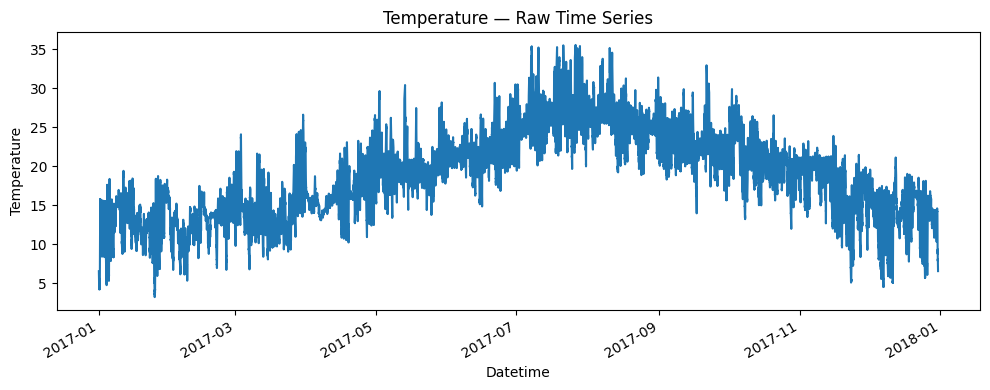

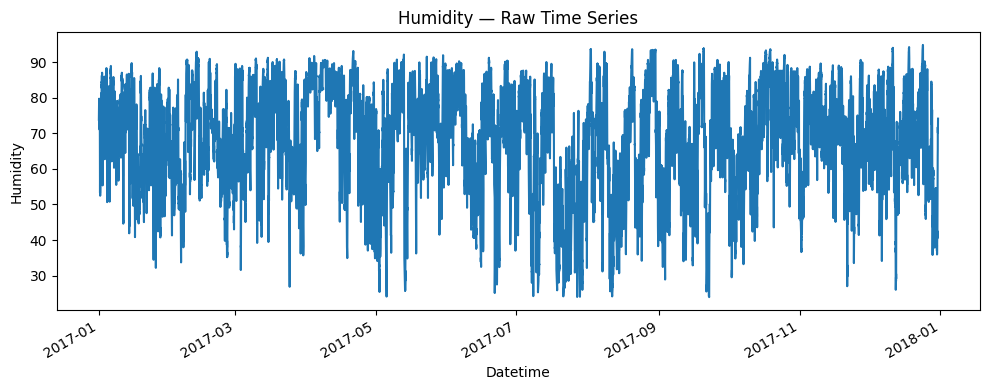

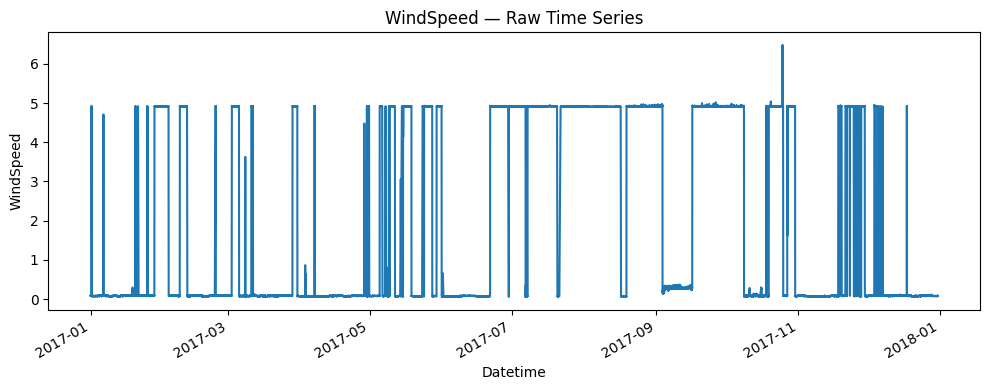

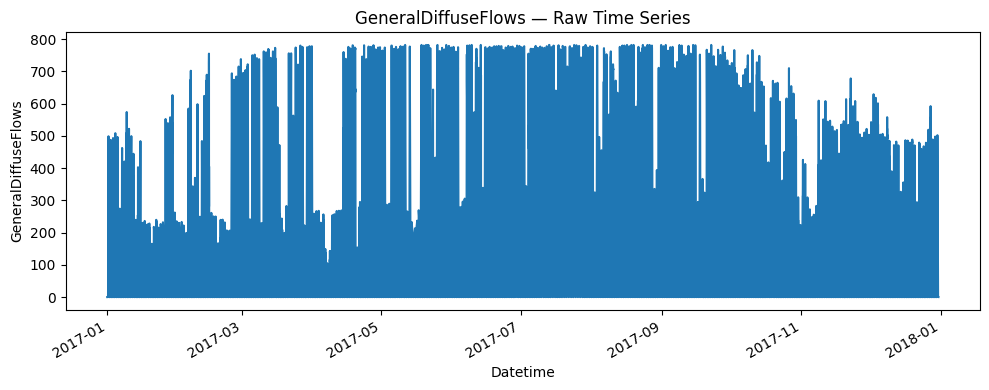

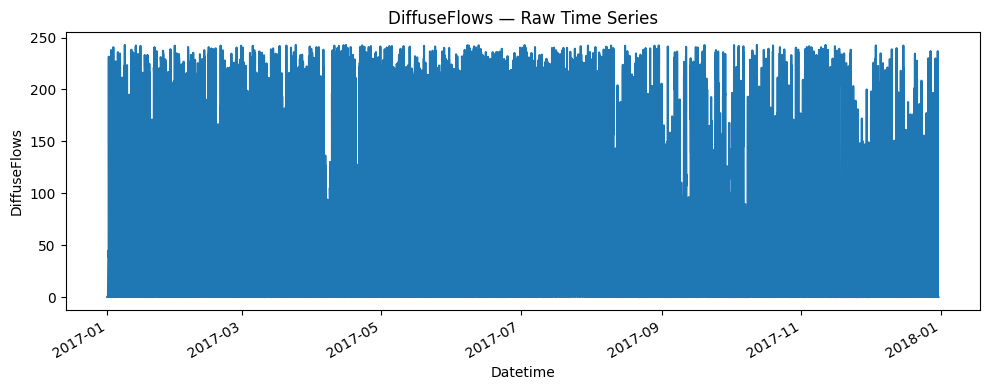

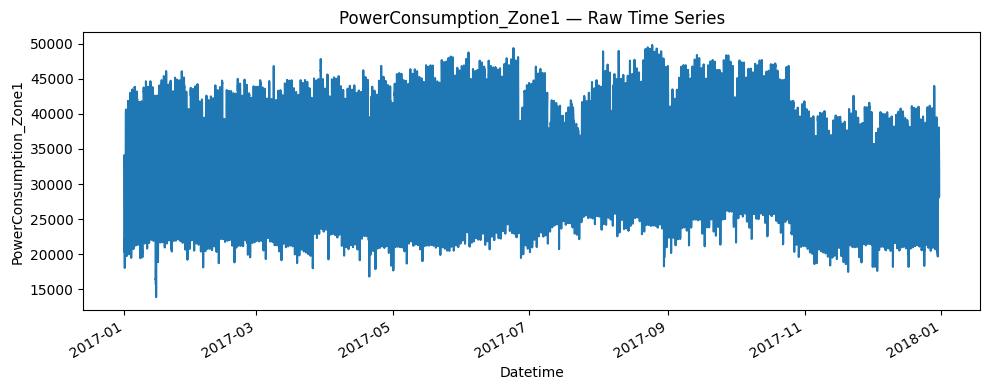

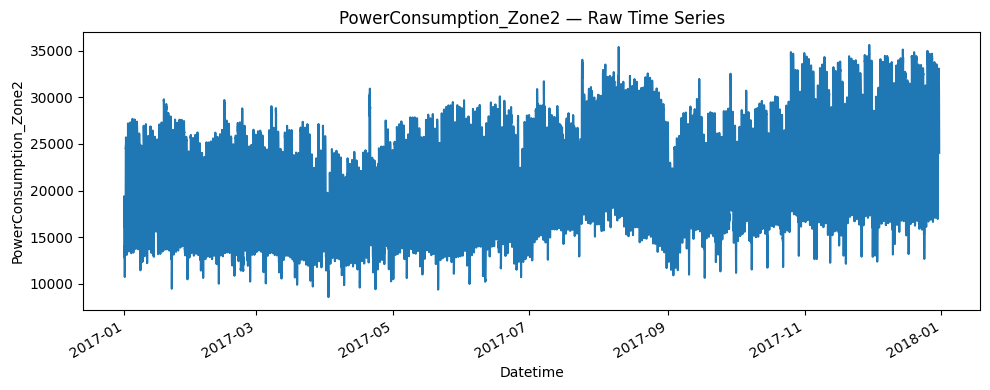

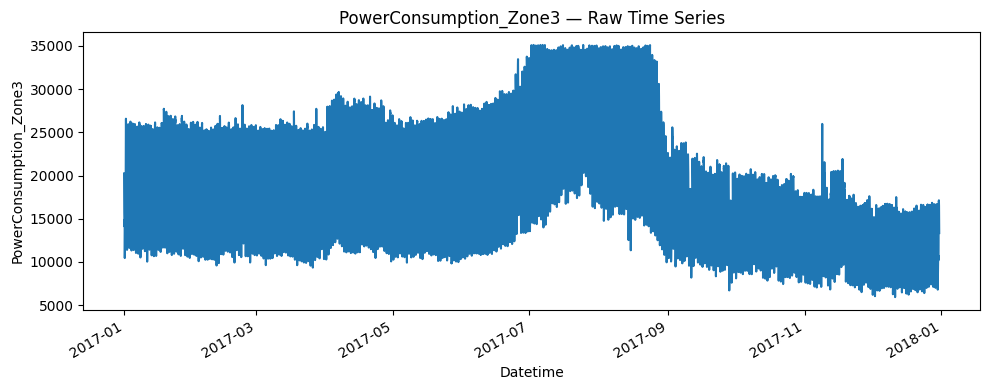

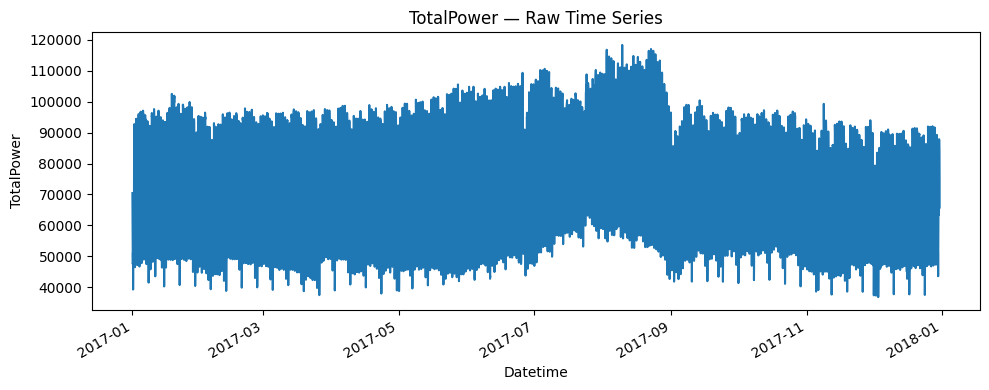

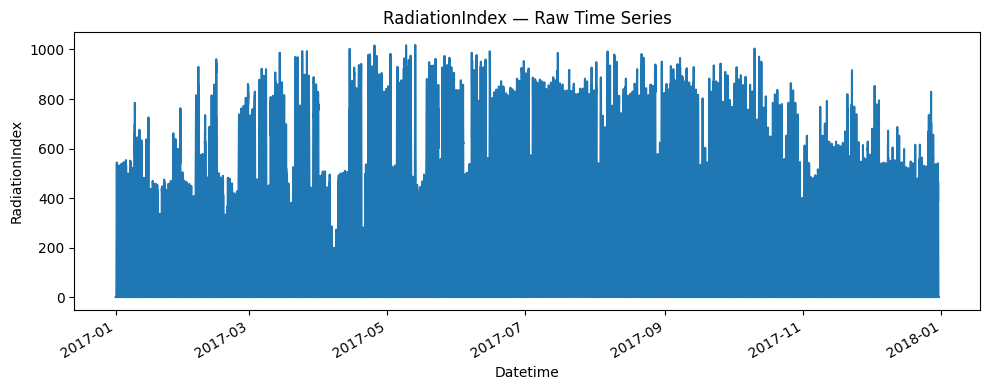

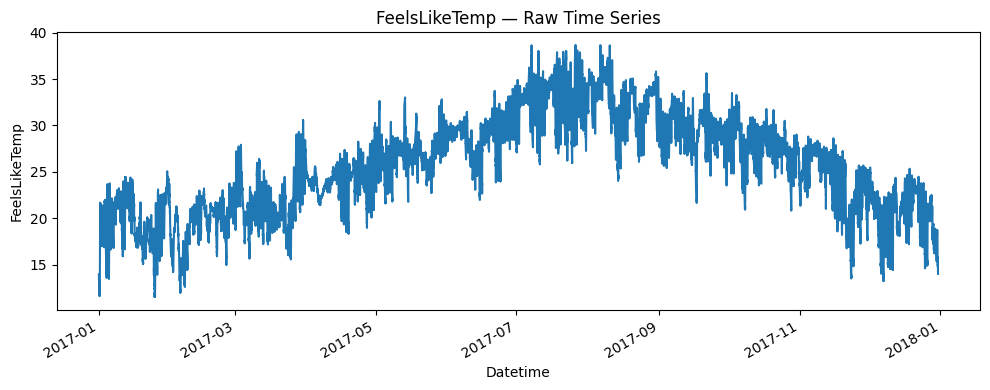

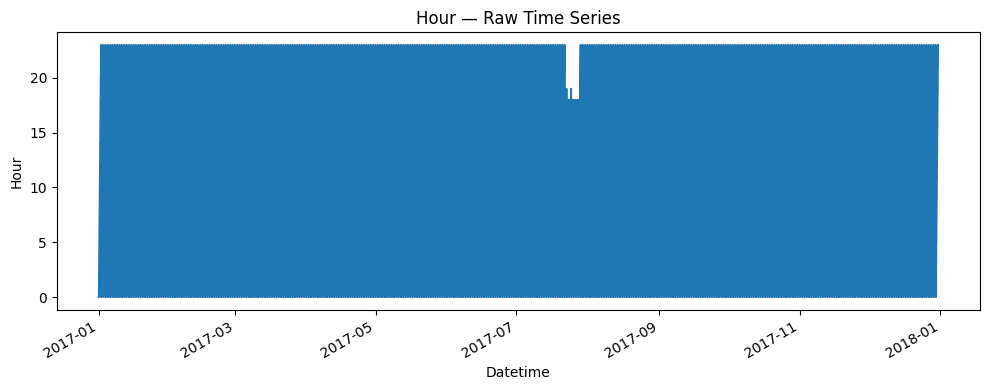

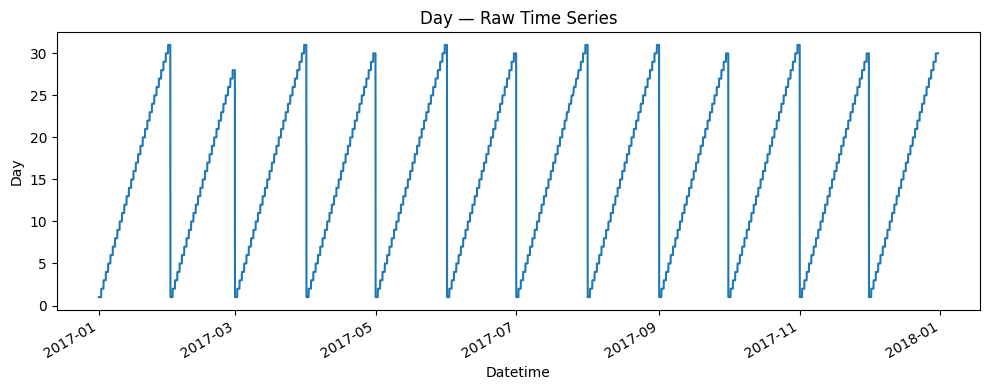

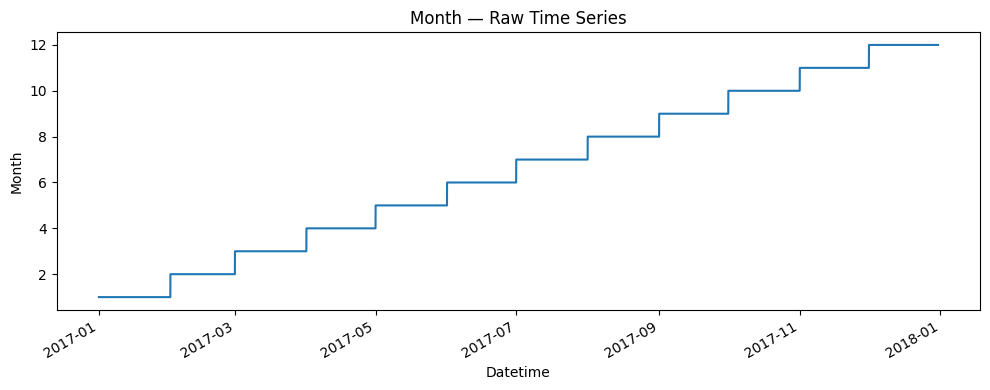

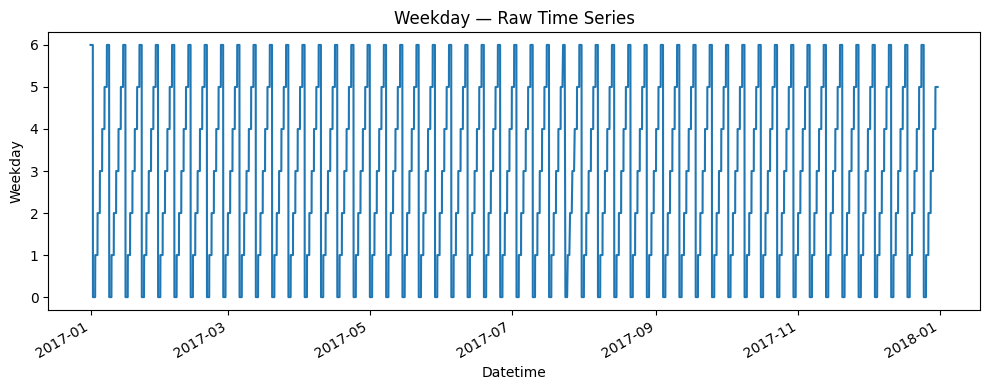

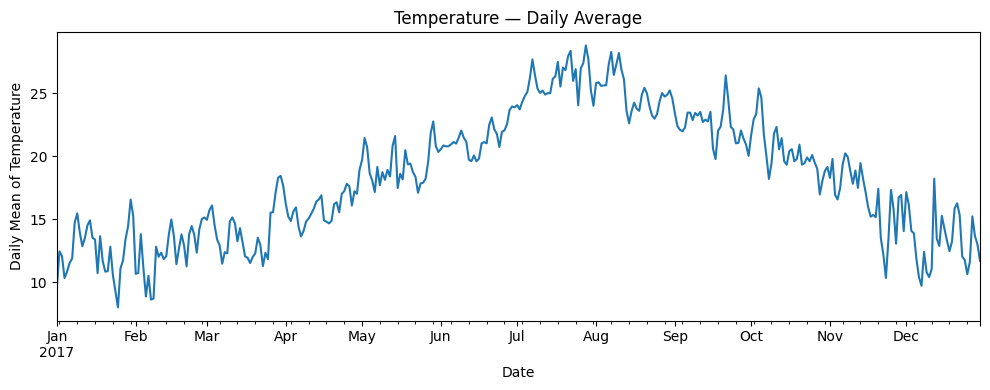

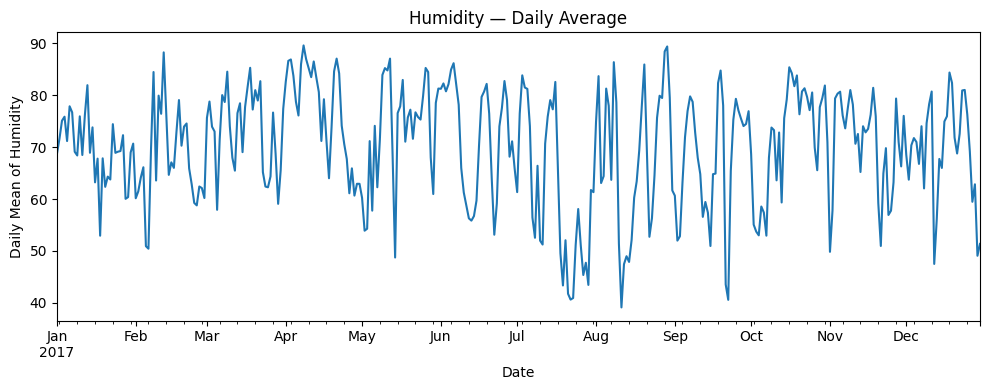

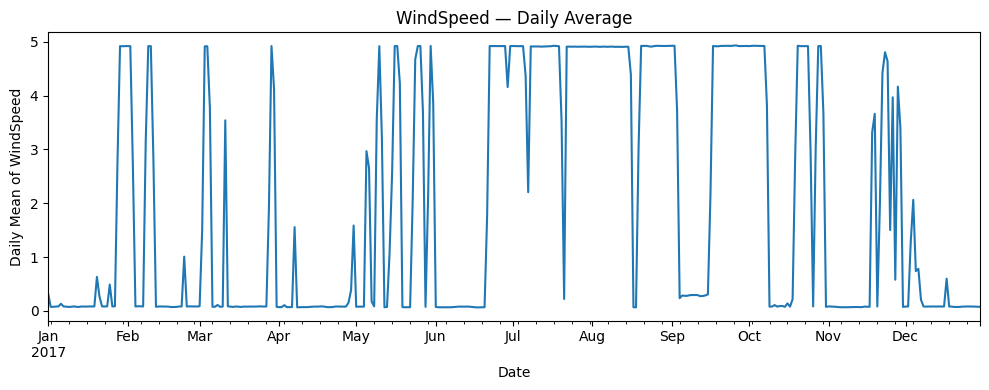

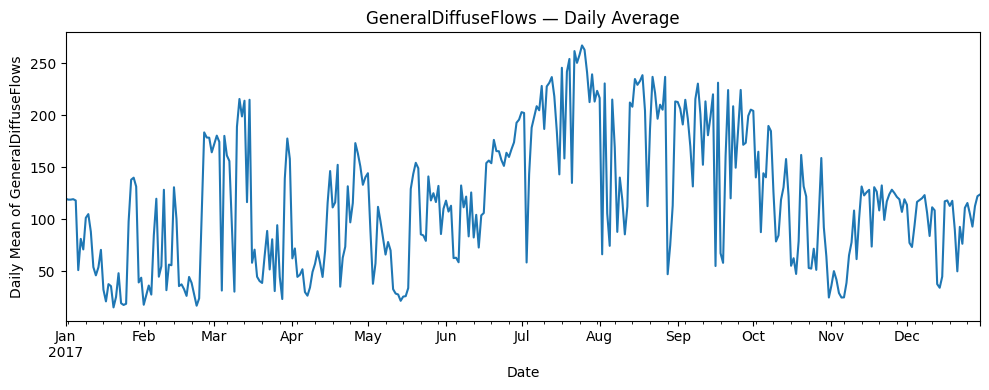

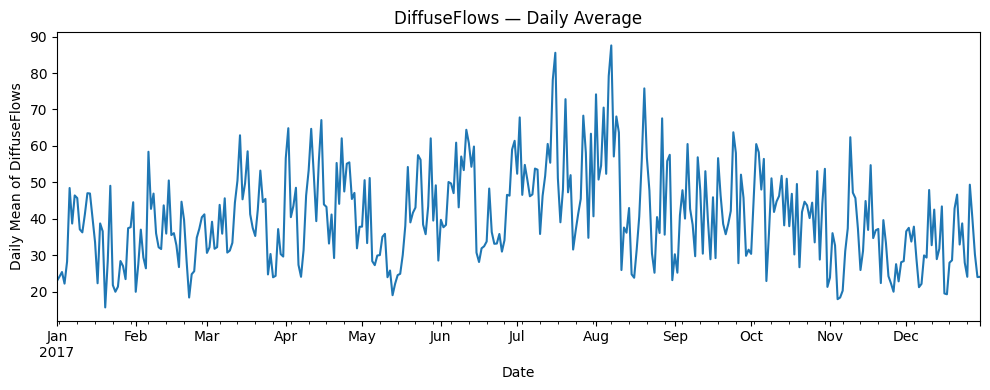

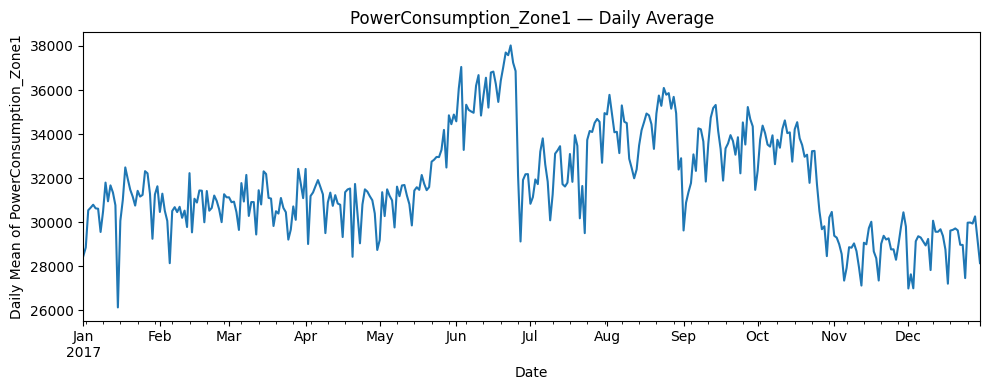

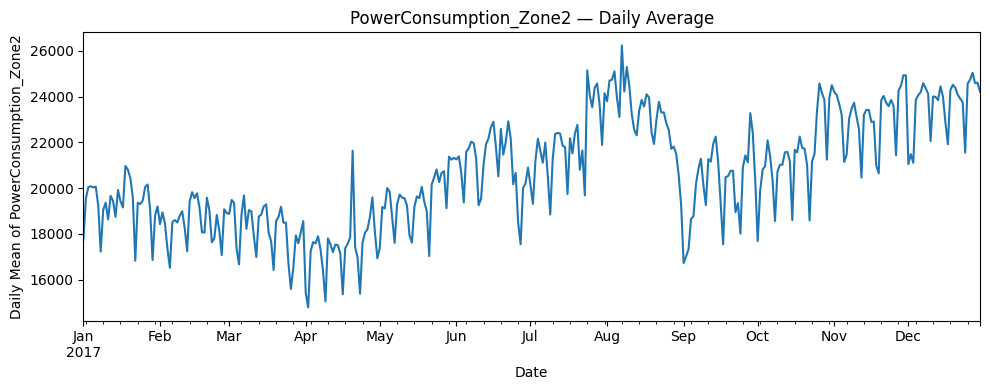

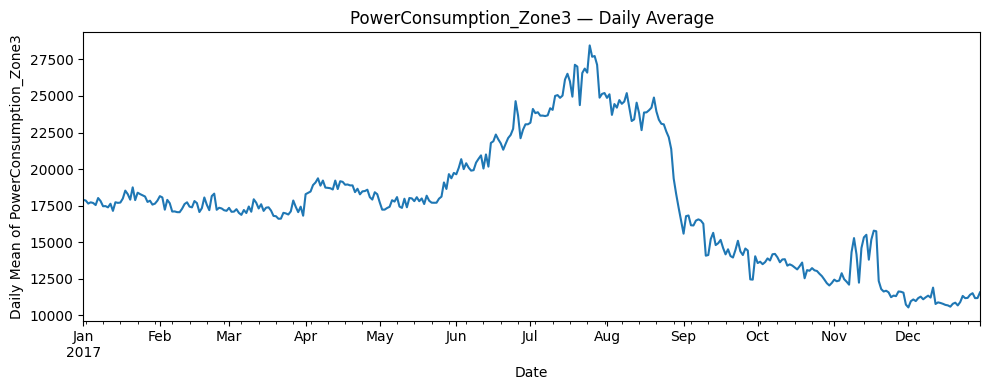

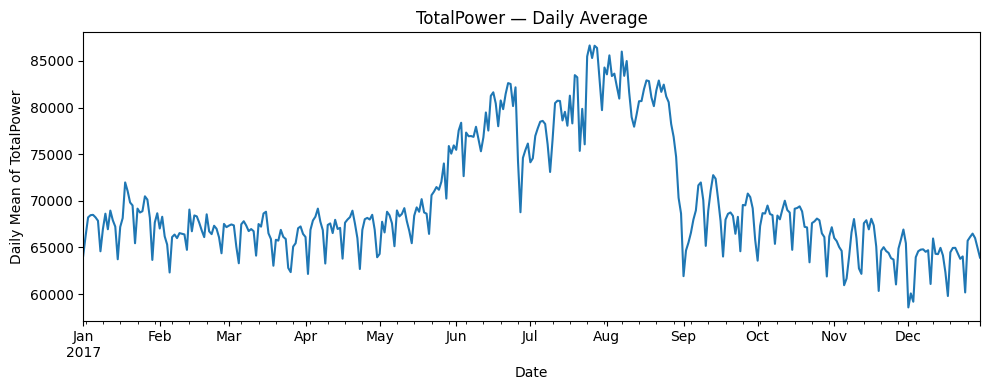

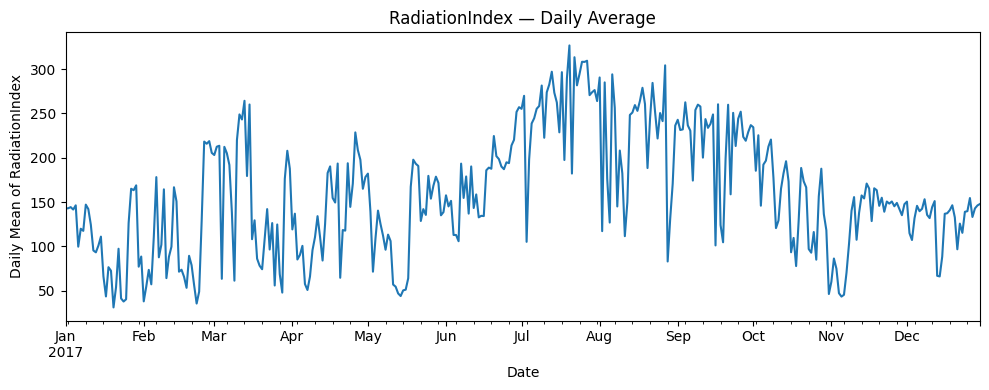

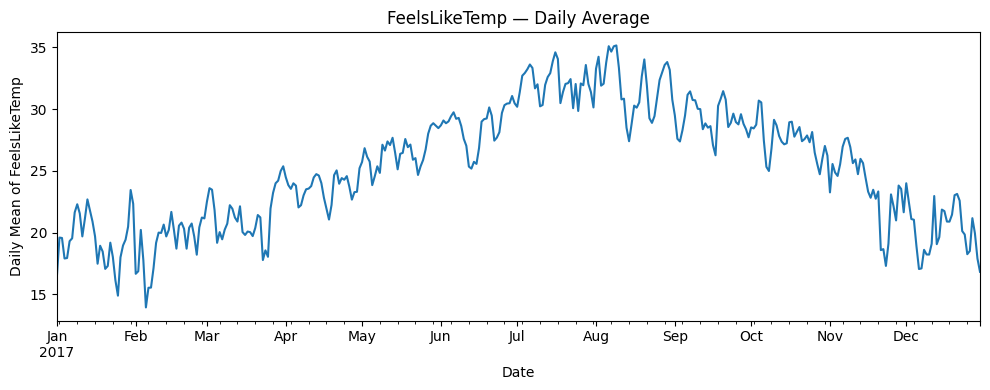

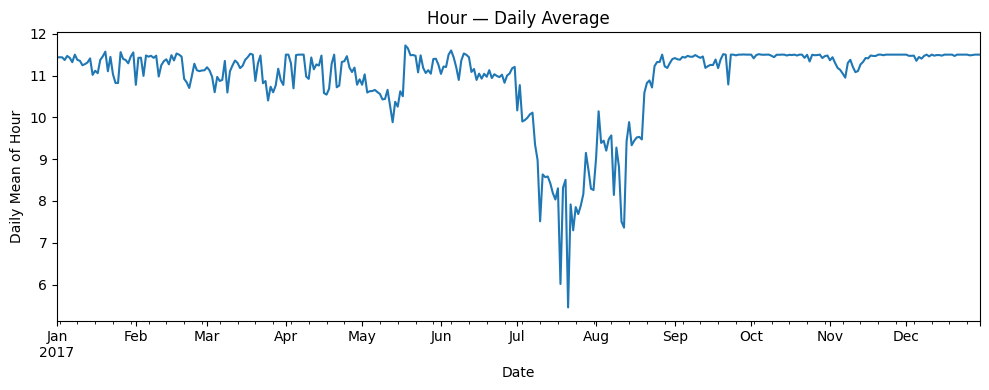

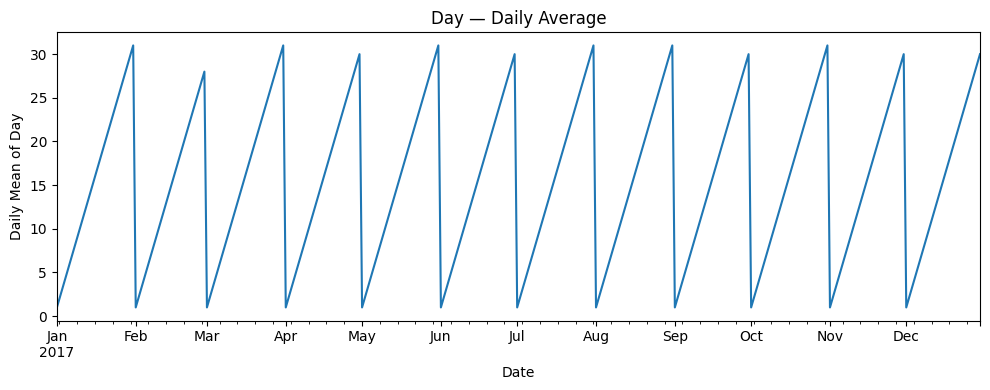

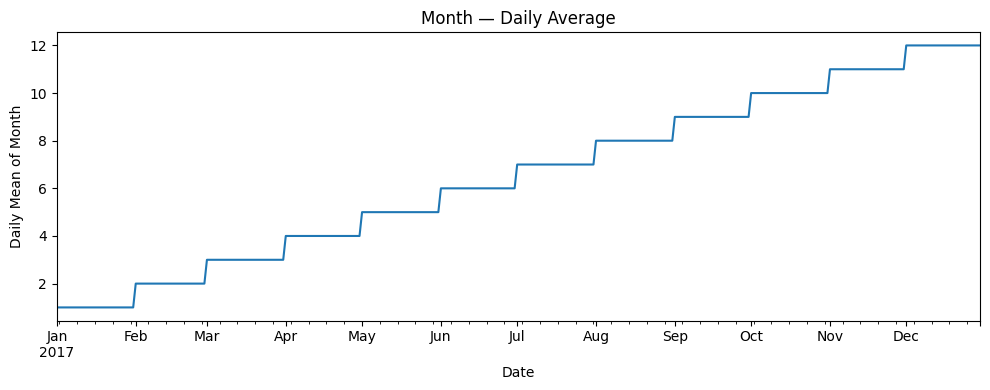

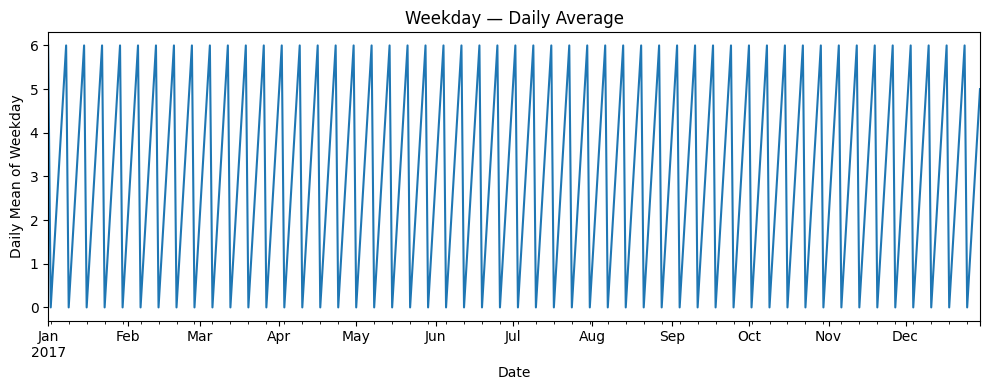

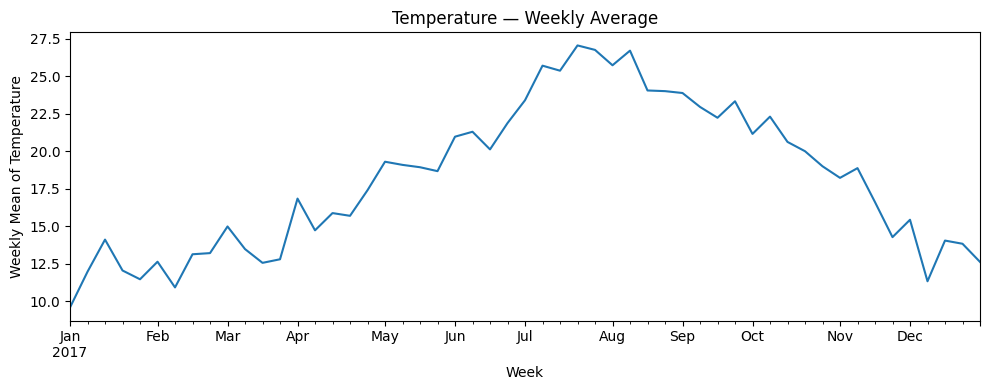

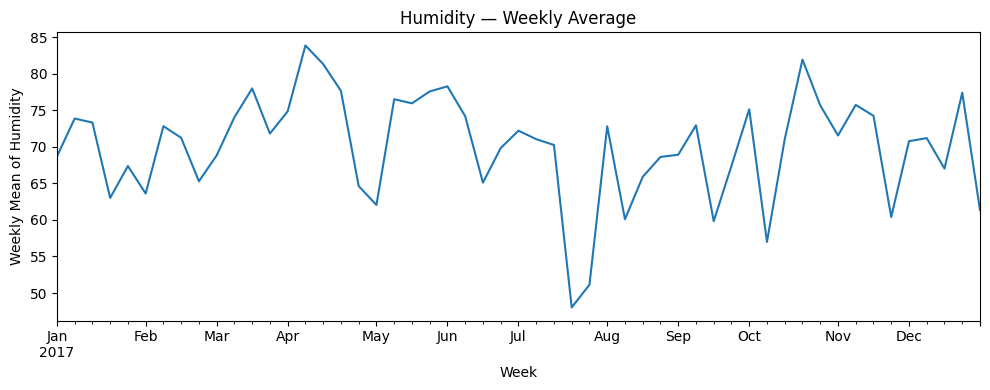

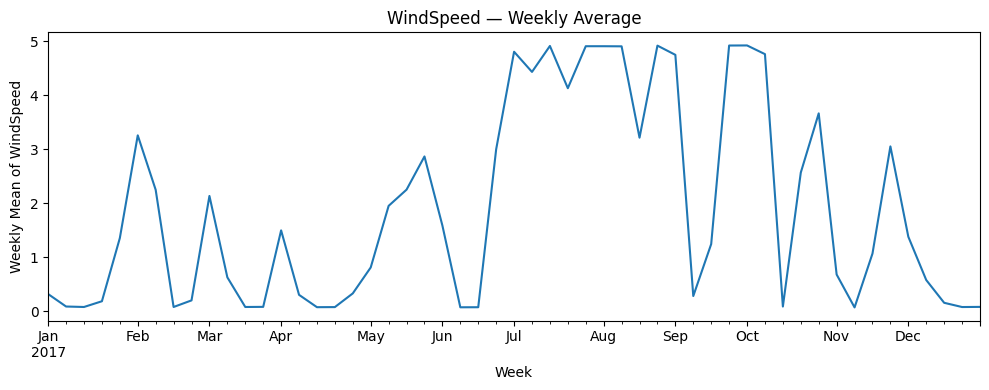

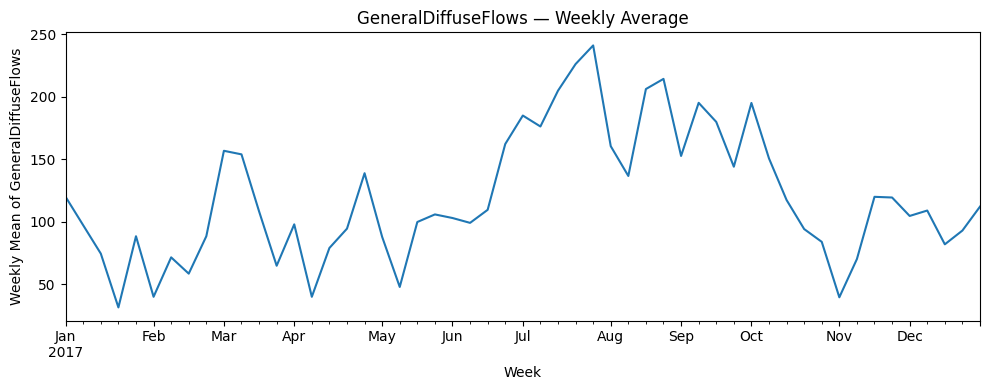

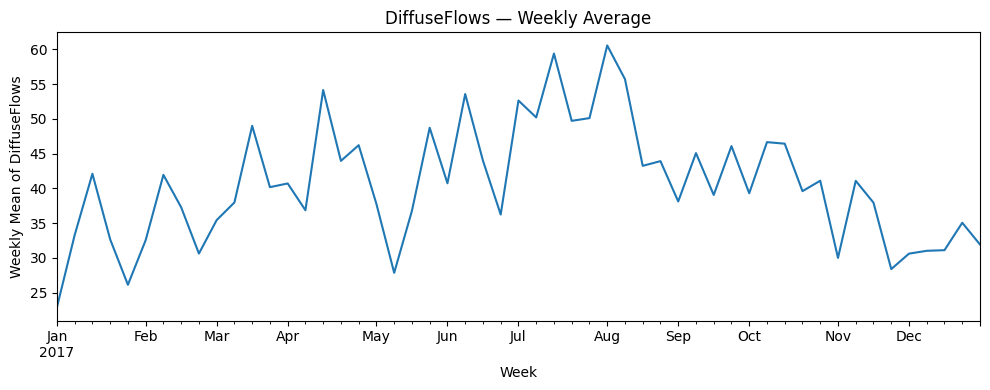

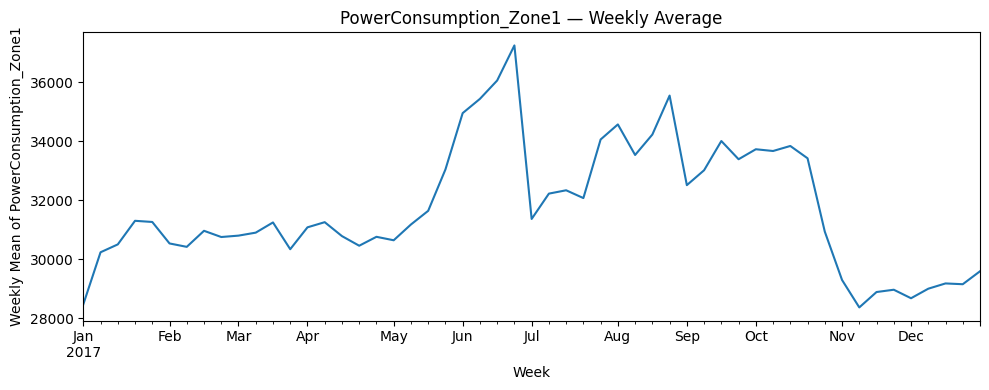

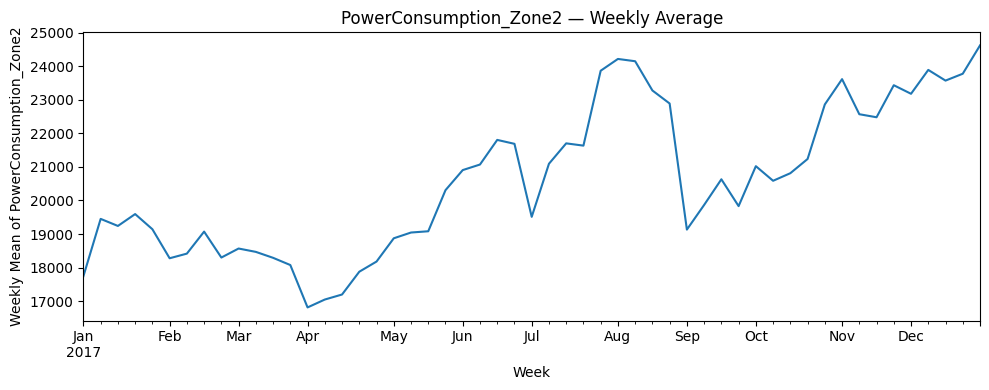

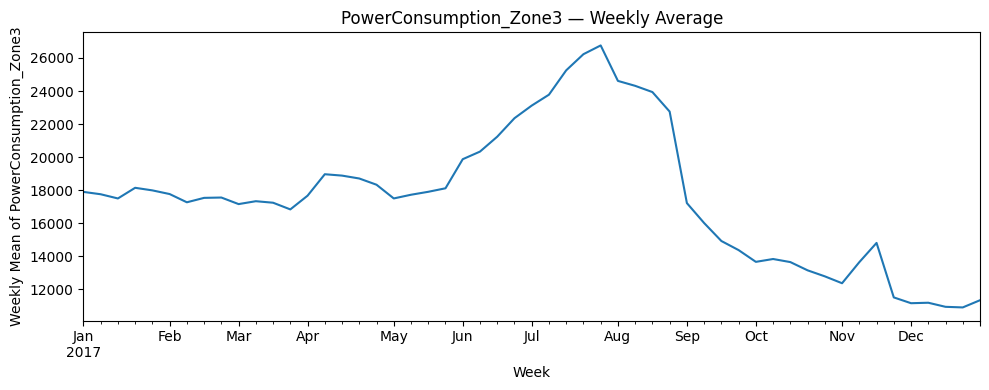

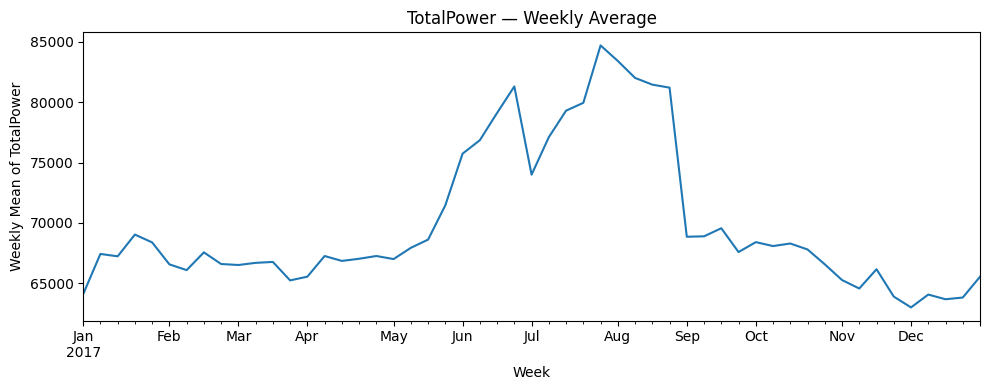

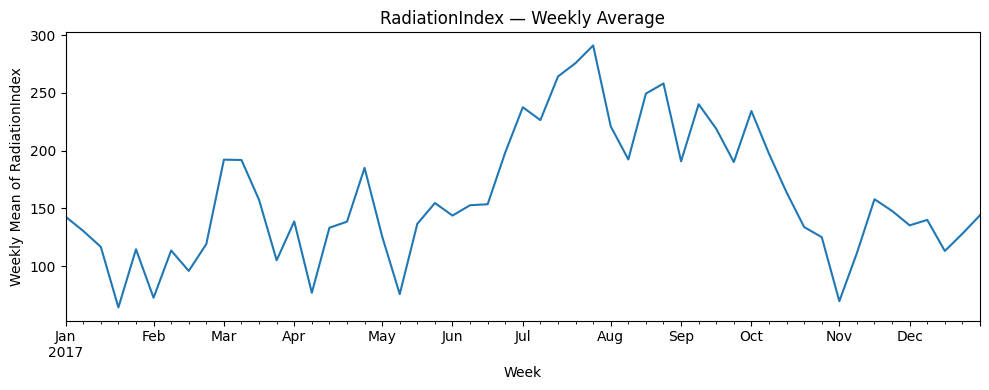

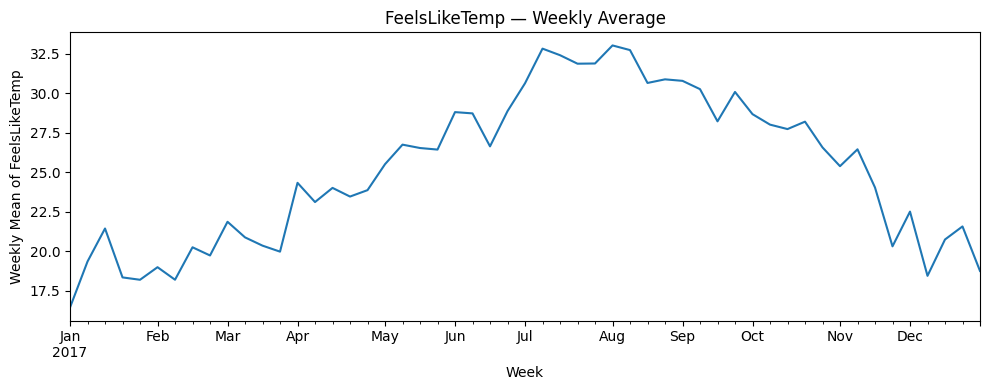

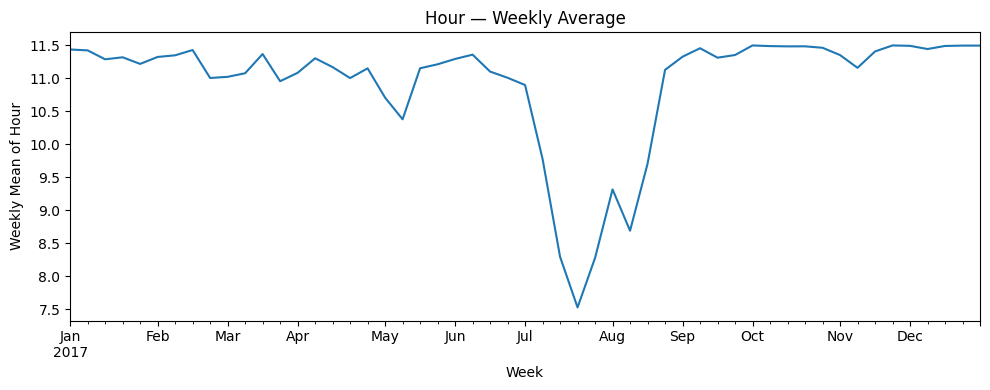

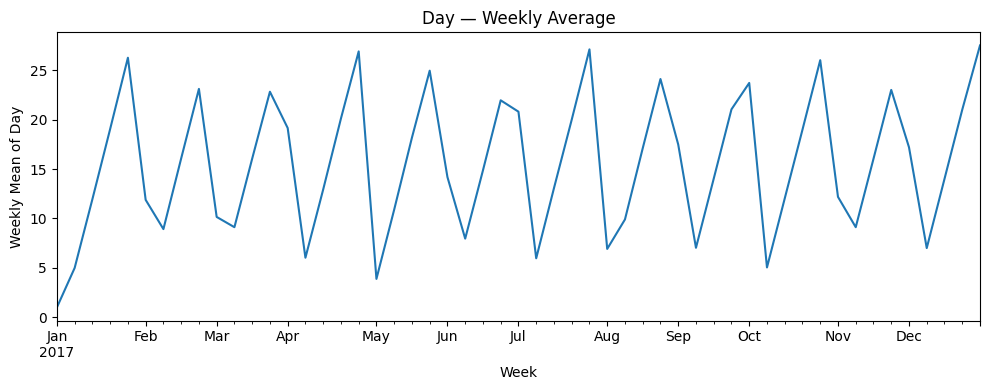

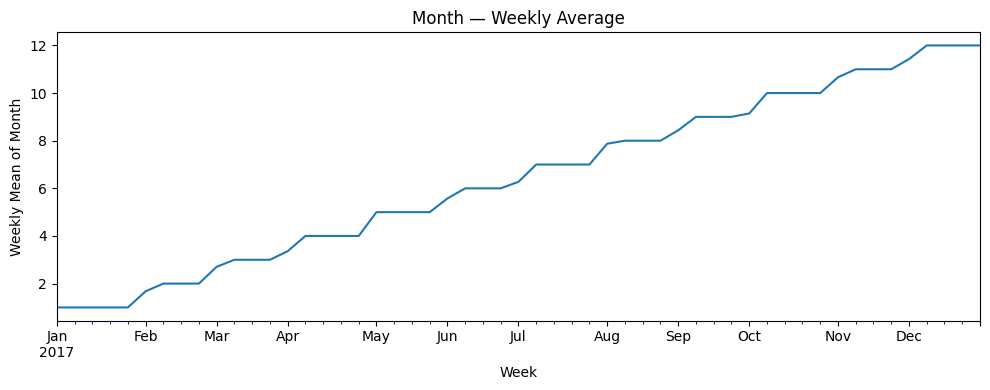

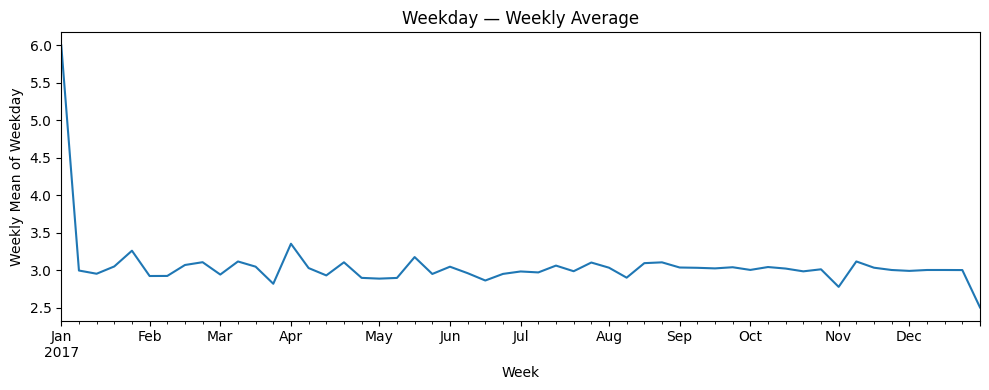

Saved PNGs for raw, daily, and weekly charts for each numeric column.


In [ ]:
# Step 13: Visualization — Matplotlib line charts

import pandas as pd
import matplotlib.pyplot as plt

# 1) Make sure Datetime is proper and set as index (safe to re-run)
if 'Datetime' in dataframe1.columns:
    dataframe1['Datetime'] = pd.to_datetime(dataframe1['Datetime'], errors='coerce')
    dataframe1 = dataframe1.set_index('Datetime').sort_index()

# 2) Detect numeric columns automatically (skips non-numeric like IDs/labels)
num_cols = dataframe1.select_dtypes(include='number').columns.tolist()
if not num_cols:
    raise ValueError("No numeric columns found to plot. Please check your dataset.")

# (Optional) If your data has extreme missing timestamps and you want smooth lines,
# you can uncomment the next line to fill small gaps:
# dataframe1 = dataframe1.asfreq('T')  # align to per-minute grid if your data is per-minute
# dataframe1[num_cols] = dataframe1[num_cols].interpolate()

# 3A) Plot RAW time series for each numeric column (one chart per column)
for col in num_cols:
    plt.figure(figsize=(10, 4))
    dataframe1[col].plot()   # no color specified (per your requirement)
    plt.title(f"{col} — Raw Time Series")
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_raw_timeseries.png", dpi=150)
    plt.show()

# 3B) DAILY average trend
daily = dataframe1[num_cols].resample('D').mean()

for col in num_cols:
    plt.figure(figsize=(10, 4))
    daily[col].plot()
    plt.title(f"{col} — Daily Average")
    plt.xlabel("Date")
    plt.ylabel(f"Daily Mean of {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_daily_avg.png", dpi=150)
    plt.show()

# 3C) WEEKLY average trend
weekly = dataframe1[num_cols].resample('W').mean()

for col in num_cols:
    plt.figure(figsize=(10, 4))
    weekly[col].plot()
    plt.title(f"{col} — Weekly Average")
    plt.xlabel("Week")
    plt.ylabel(f"Weekly Mean of {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_weekly_avg.png", dpi=150)
    plt.show()

print("Saved PNGs for raw, daily, and weekly charts for each numeric column.")


**Step 14 — Visualizing Time-Series Trends with Line Charts**

This step creates line charts for every numeric column in the dataset. Line charts are ideal for time-series data because they show patterns, peaks, and changes clearly across time.

We first detect all numeric columns automatically so the code adjusts to any dataset.

For each numeric column, we create a separate line chart.

A time-series line chart helps us understand:

How power consumption changes over time

How weather values (temperature, humidity, radiation) fluctuate

When peak or low periods occur

No colors are specified so default Matplotlib styling is used, matching project requirements.

The x-axis uses the datetime index, ensuring an accurate timeline

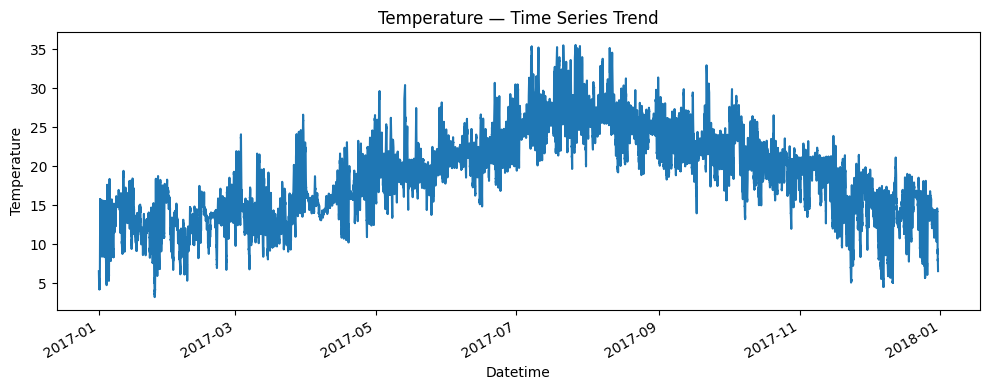

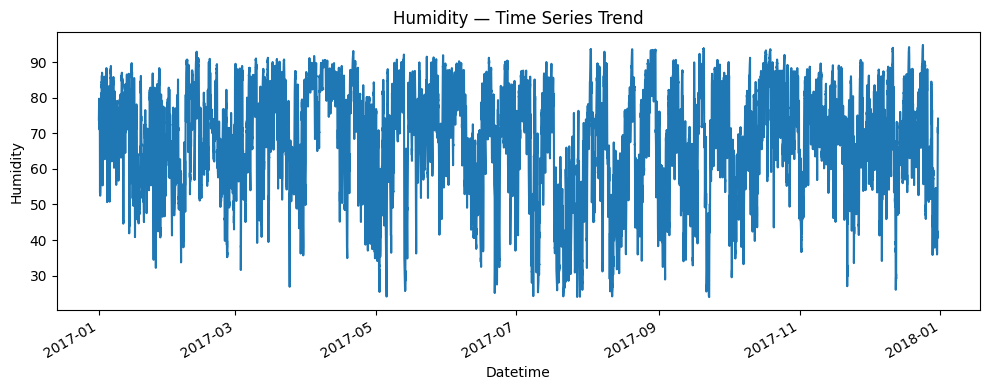

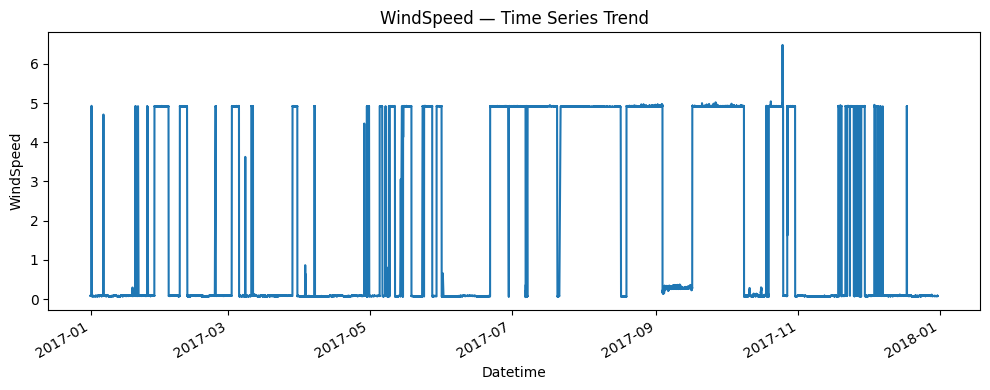

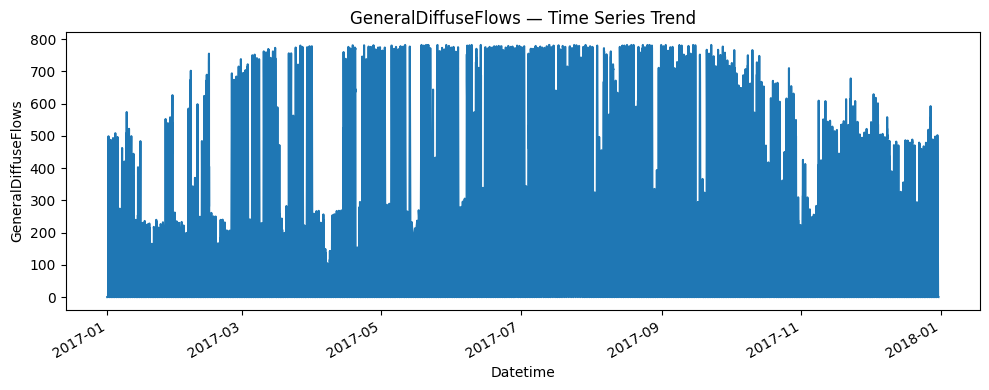

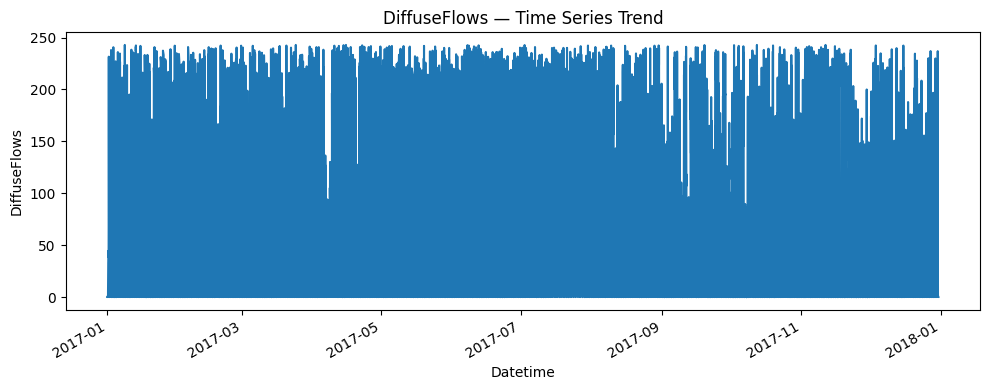

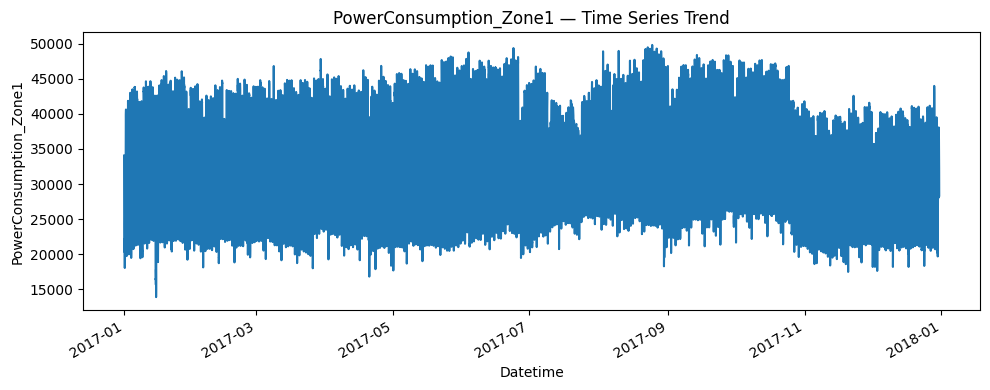

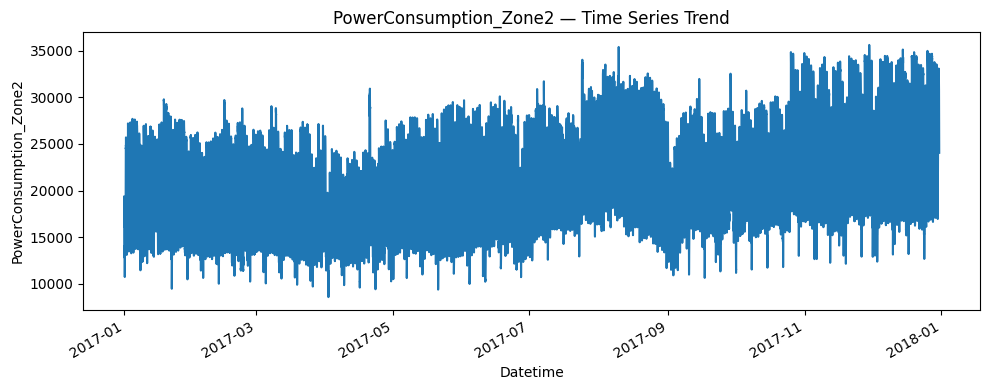

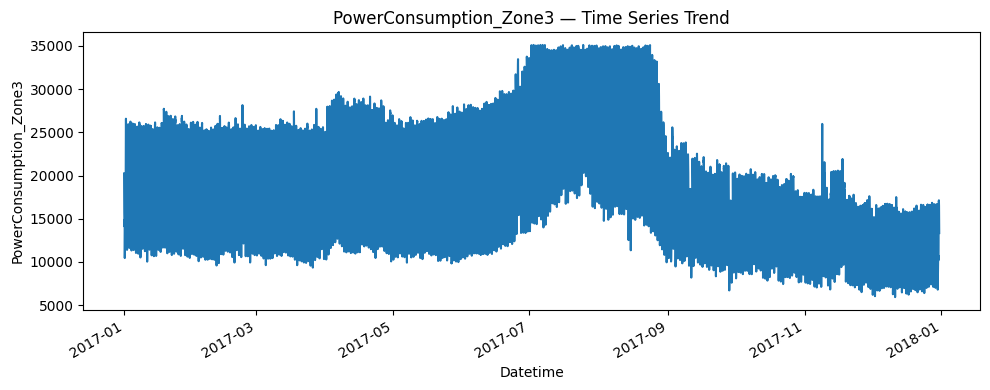

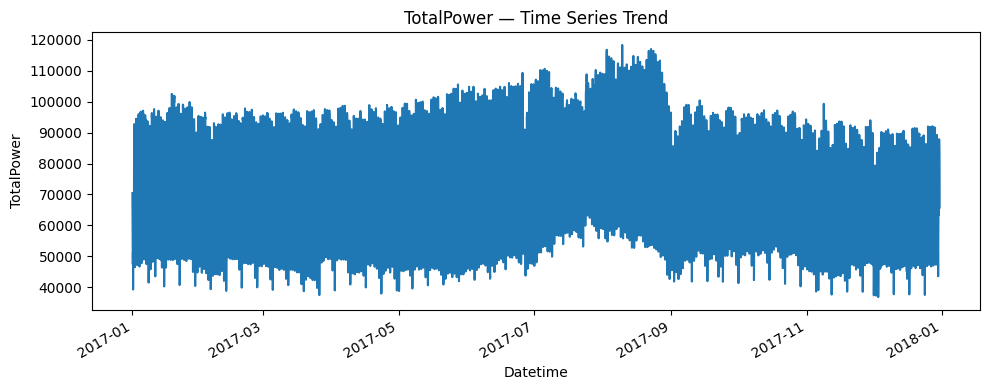

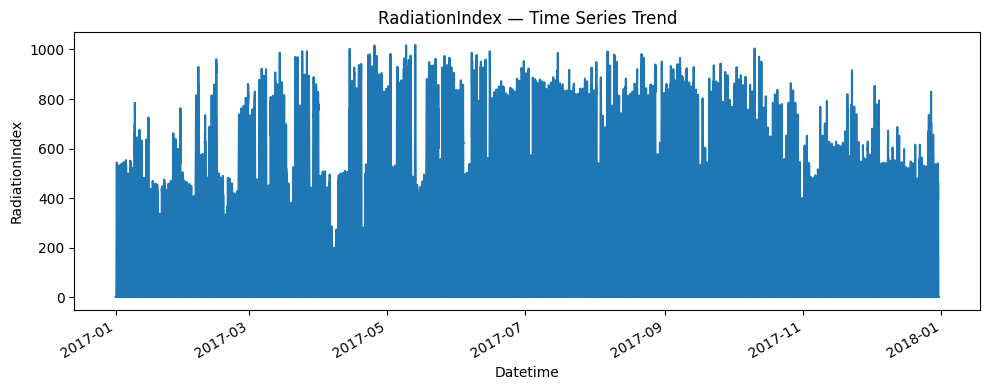

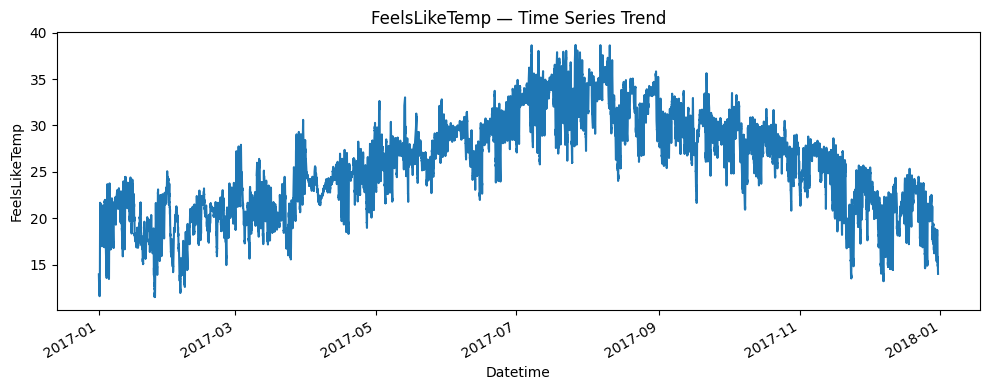

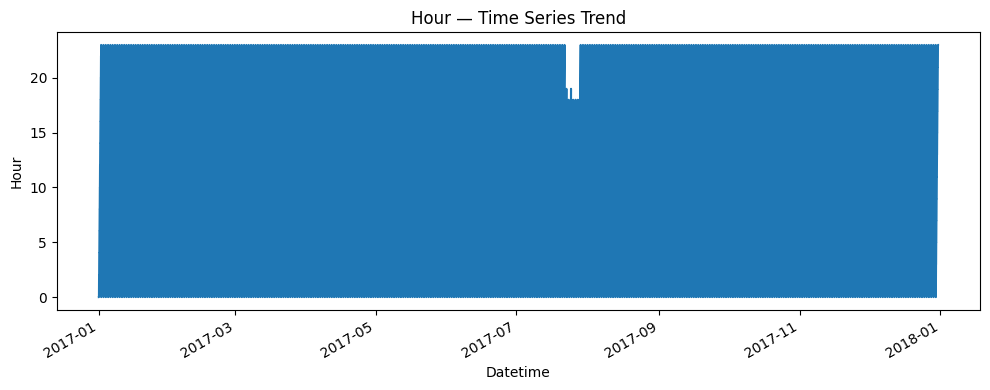

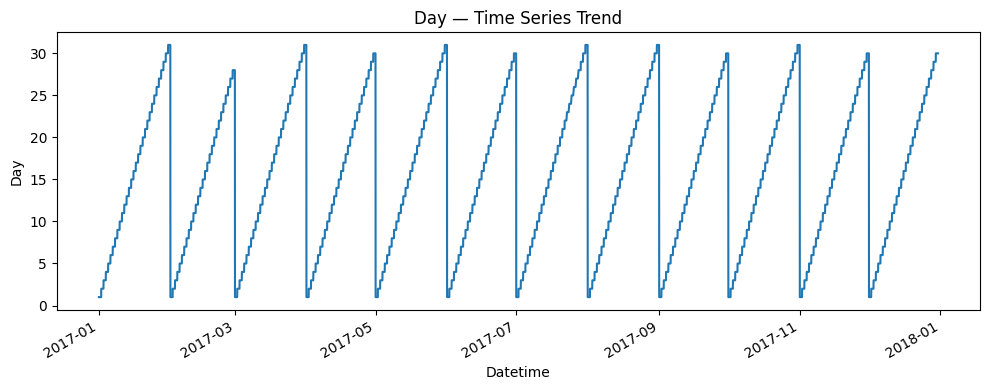

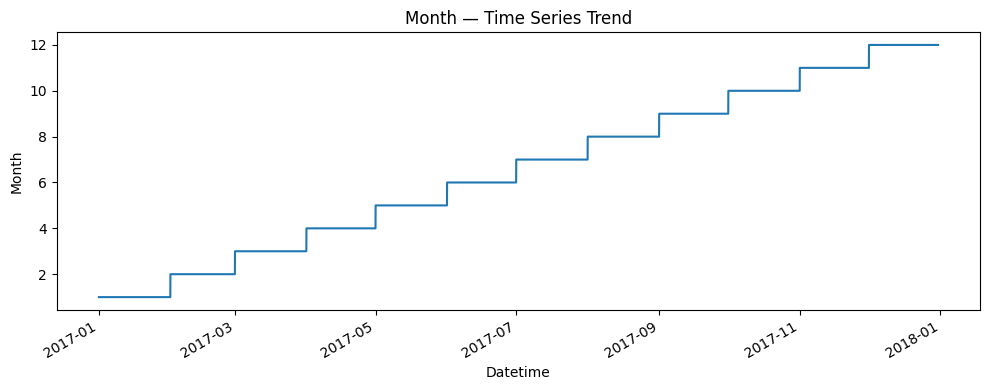

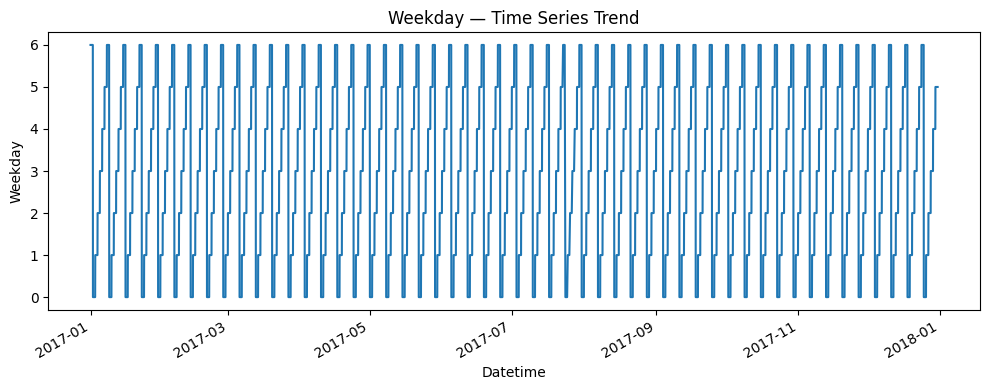

In [ ]:
# Step 14: Line chart visualizations using Matplotlib

import matplotlib.pyplot as plt

# Detect numeric columns automatically
numeric_cols = dataframe1.select_dtypes(include='number').columns.tolist()

# Raw time-series plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    dataframe1[col].plot()  # no color specified (as required)
    plt.title(f"{col} — Time Series Trend")
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Step 15 — Saving Time-Series Plots as PNG Files**

After visualizing all numeric columns in Step 14, we now save every line chart into PNG files. Saving charts is important because:

PNG files can be inserted into reports, presentations, and documentation.

It helps create a complete data analysis project.

Results can be shared without running the notebook.

The code loops through each numeric column, recreates the line chart, and saves it using plt.savefig(). Each file is stored with a unique name (for example, Temperature_timeseries.png, Humidity_timeseries.png, etc.). After saving, the plot is closed to free memory.

In [ ]:
# Step 15: Save all time-series plots to PNG files

import matplotlib.pyplot as plt

# Detect numeric columns
numeric_cols = dataframe1.select_dtypes(include='number').columns.tolist()

# Loop and save each column's line chart
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    dataframe1[col].plot()
    plt.title(f"{col} — Time Series Trend")
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_timeseries.png", dpi=150)   # save image
    plt.close()

print("All time-series charts saved as PNG files in the current directory.")


All time-series charts saved as PNG files in the current directory.


**Step 16 — Daily, Weekly, Monthly Trend Visualizations**

After saving the raw time-series charts, this step smooths the data to show clear and meaningful long-term trends.

Daily averages
These show short-term fluctuations and help identify day-to-day power usage patterns.

Weekly averages
Weekly smoothing reveals medium-term patterns like weekend effects or weekly load cycles.

Monthly averages
Monthly trends highlight seasonal behavior, weather cycles, and long-term power consumption changes.

Each numeric column is plotted separately, and all charts are saved automatically as PNG files. These smoothed charts are extremely useful in final reports and presentations because they reduce noise and reveal true underlying behavior

In [ ]:
# Step 16: Daily, Weekly, Monthly Resampled Line Charts

# 1. Daily resample
daily_resampled = dataframe1.resample('D').mean()

# 2. Weekly resample
weekly_resampled = dataframe1.resample('W').mean()

# 3. Monthly resample
monthly_resampled = dataframe1.resample('M').mean()

# Detect numeric columns
numeric_cols = dataframe1.select_dtypes(include='number').columns.tolist()

# --- Daily Trend Plots ---
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    daily_resampled[col].plot()
    plt.title(f"{col} — Daily Average Trend")
    plt.xlabel("Date")
    plt.ylabel(f"Daily Avg {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_daily_avg.png", dpi=150)
    plt.close()

# --- Weekly Trend Plots ---
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    weekly_resampled[col].plot()
    plt.title(f"{col} — Weekly Average Trend")
    plt.xlabel("Week")
    plt.ylabel(f"Weekly Avg {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_weekly_avg.png", dpi=150)
    plt.close()

# --- Monthly Trend Plots ---
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    monthly_resampled[col].plot()
    plt.title(f"{col} — Monthly Average Trend")
    plt.xlabel("Month")
    plt.ylabel(f"Monthly Avg {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_monthly_avg.png", dpi=150)
    plt.close()

print("Daily, Weekly, Monthly resampled charts saved successfully.")

/tmp/ipython-input-514648808.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = dataframe1.resample('M').mean()


Daily, Weekly, Monthly resampled charts saved successfully.


**Step 17 — Correlation Analysis + Heatmap**

The goal of this step is to discover how different numerical variables are related to each other.
Correlation values range between –1 and +1:

+1 = perfect positive relation (both increase together)

–1 = perfect negative relation (one increases while the other decreases)

0 = no relationship

What this step does:

Select numeric columns
Only numerical data is included because correlation works on numbers.

Create a correlation matrix
This table shows the strength of the relationships between every pair of features (e.g., Temperature vs TotalPower).

Generate a heatmap using Matplotlib
Each cell is color-coded based on correlation value:

Brighter → strong relationship

Darker → weak or negative relationship

Save the heatmap as PNG
You can use the image in your report or PPT.

**Why this is important:**

Helps identify which weather features affect energy consumption.

Shows whether the three power zones are highly synchronized.

Helps remove irrelevant features and focus on important variables.

Makes your project analysis more professional and unique.

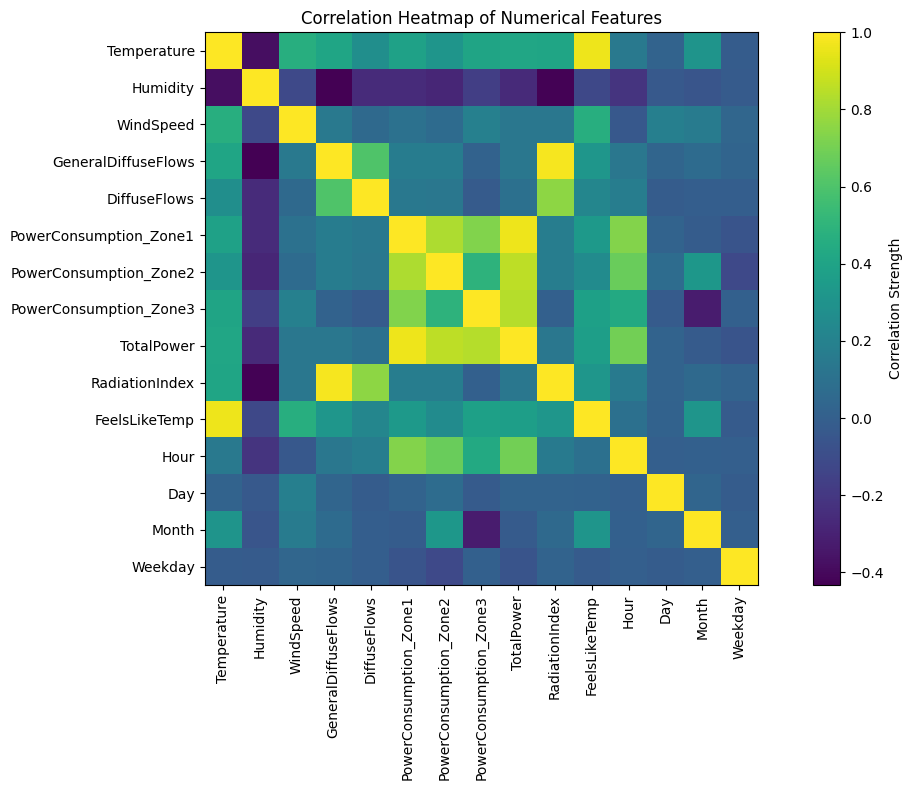

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Temperature                1.000000 -0.378135   0.467686             0.410596   
Humidity                  -0.378135  1.000000  -0.117877            -0.433436   
WindSpeed                  0.467686 -0.117877   1.000000             0.143547   
GeneralDiffuseFlows        0.410596 -0.433436   0.143547             1.000000   
DiffuseFlows               0.277398 -0.255251   0.055945             0.606523   
PowerConsumption_Zone1     0.385201 -0.256735   0.103388             0.166459   
PowerConsumption_Zone2     0.313122 -0.280568   0.069801             0.170904   
PowerConsumption_Zone3     0.403062 -0.170125   0.189345             0.014939   
TotalPower                 0.414567 -0.263245   0.136272             0.132519   
RadiationIndex             0.409390 -0.422666   0.132755             0.979605   
FeelsLikeTemp              0.964771 -0.121256   0.467969             0.317075   
Hour                       0.145730 -0.220263  -0.036556             0.136231   
Day                        0.022984 -0.033897   0.182616             0.033890   
Month                      0.307590 -0.054155   0.162175             0.067795   
Weekday                   -0.016884 -0.022911   0.039643             0.028579   

                        DiffuseFlows  PowerConsumption_Zone1  \
Temperature                 0.277398                0.385201   
Humidity                   -0.255251               -0.256735   
WindSpeed                   0.055945                0.103388   
GeneralDiffuseFlows         0.606523                0.166459   
DiffuseFlows                1.000000                0.141602   
PowerConsumption_Zone1      0.141602                1.000000   
PowerConsumption_Zone2      0.133523                0.822686   
PowerConsumption_Zone3     -0.020894                0.730387   
TotalPower                  0.096757                0.964450   
RadiationIndex              0.753908                0.173335   
FeelsLikeTemp               0.224895                0.340063   
Hour                        0.172092                0.732167   
Day                        -0.015183                0.023789   
Month                      -0.002572               -0.013599   
Weekday                    -0.003699               -0.058894   

                        PowerConsumption_Zone2  PowerConsumption_Zone3  \
Temperature                           0.313122                0.403062   
Humidity                             -0.280568               -0.170125   
WindSpeed                             0.069801                0.189345   
GeneralDiffuseFlows                   0.170904                0.014939   
DiffuseFlows                          0.133523               -0.020894   
PowerConsumption_Zone1                0.822686                0.730387   
PowerConsumption_Zone2                1.000000                0.495585   
PowerConsumption_Zone3                0.495585                1.000000   
TotalPower                            0.857486                0.840717   
RadiationIndex                        0.174966                0.007064   
FeelsLikeTemp                         0.256004                0.383829   
Hour                                  0.673915                0.436067   
Day                                   0.071890               -0.023485   
Month                                 0.327342               -0.326485   
Weekday                              -0.114506                0.007484   

                        TotalPower  RadiationIndex  FeelsLikeTemp      Hour  \
Temperature               0.414567        0.409390       0.964771  0.145730   
Humidity                 -0.263245       -0.422666      -0.121256 -0.220263   
WindSpeed                 0.136272        0.132755       0.467969 -0.036556   
GeneralDiffuseFlows       0.132519        0.979605       0.317075  0.136231   
DiffuseFlows              0.096757        0.753908       0.224895  0.172092   
PowerConsumption_Zone1    0.964450        0

In [ ]:
# Step 17 — Correlation Analysis + Heatmap

import matplotlib.pyplot as plt

# 1) Select only numeric columns for correlation
numeric_cols = dataframe1.select_dtypes(include='number')

# 2) Compute correlation matrix
corr_matrix = numeric_cols.corr()

# 3) Plot correlation heatmap manually using matplotlib (no seaborn allowed)
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Strength')

# 4) Add labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()

# Save heatmap
plt.savefig("correlation_heatmap.png", dpi=150)

plt.show()

# Display correlation values
corr_matrix


**Step 18 — Distribution Plots Using Histograms**

This step visualizes the distribution of every numeric variable using histograms.
Histograms are essential for understanding the shape of the data.

**What histograms reveal:**

**Central tendency:**
Shows where most of the values lie (middle, left, or right).

**Spread:**
Wide histograms indicate high variability; narrow histograms show stable values.

**Skewness:**
If the histogram leans left or right, it indicates uneven distribution.

**Outliers:**
Bars far away from the main group show extreme values.

**Why this step is important:**

It helps identify unusual patterns in weather and power data.

Understanding distribution supports better feature engineering and model selection.

It makes the analysis richer and more professional.

You get a clear idea of how each numeric feature behaves in isolation.

Each histogram is automatically saved as a PNG file for use in reports or presentations.

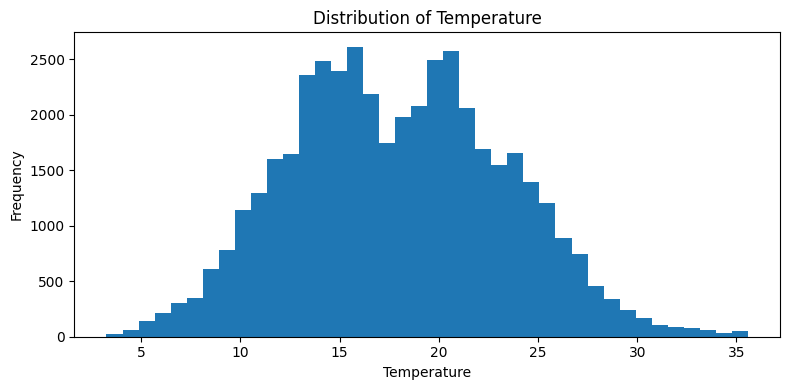

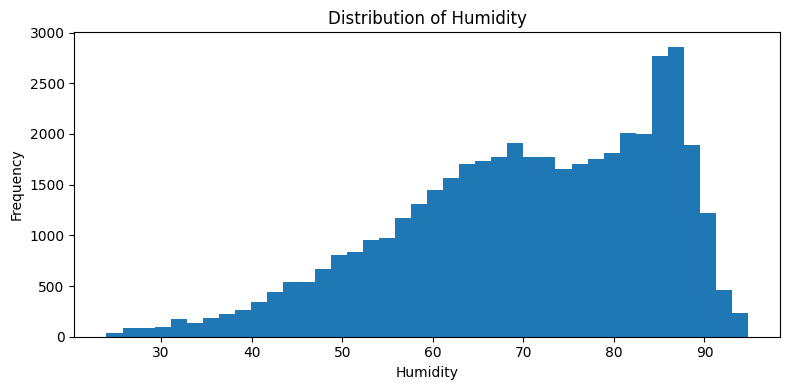

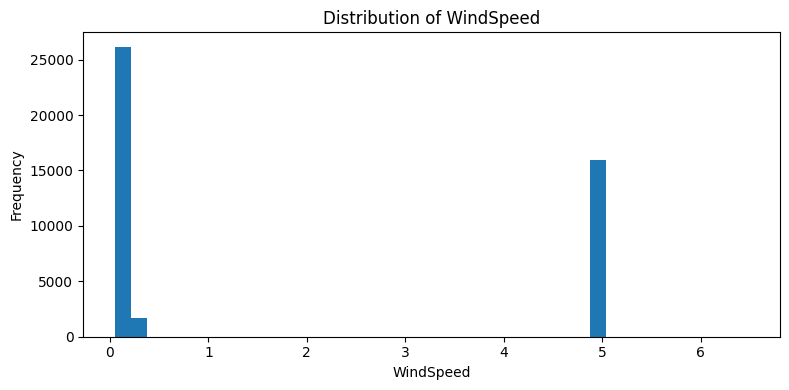

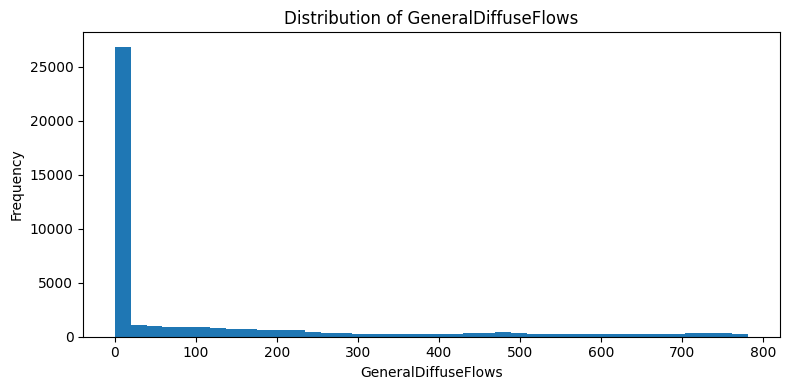

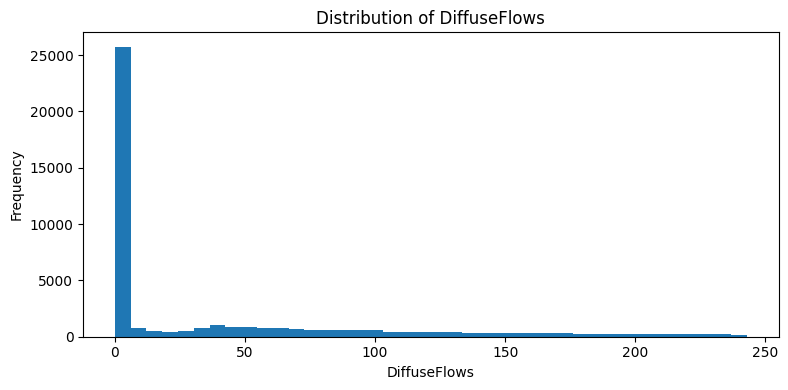

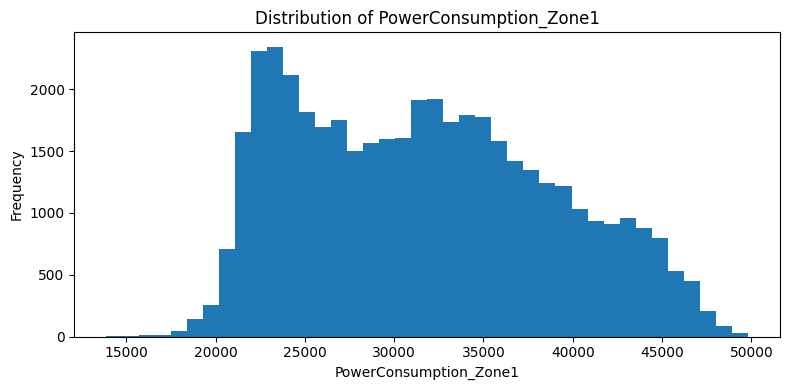

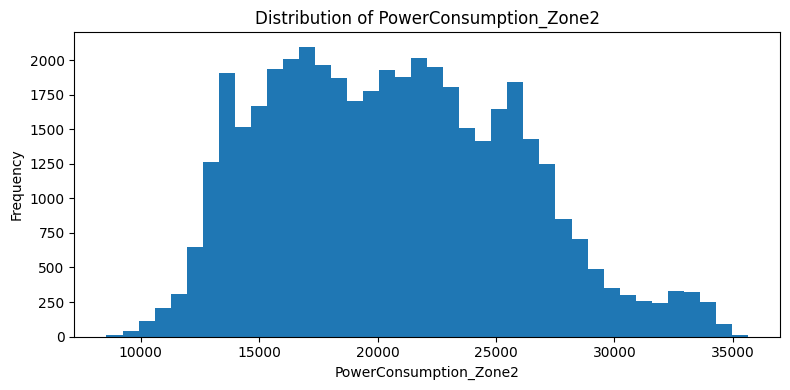

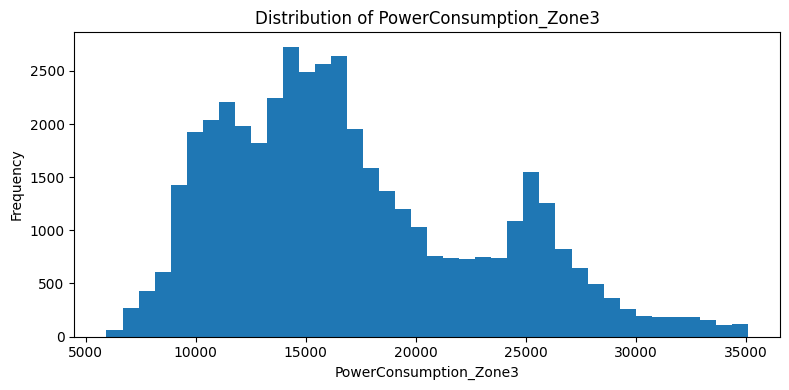

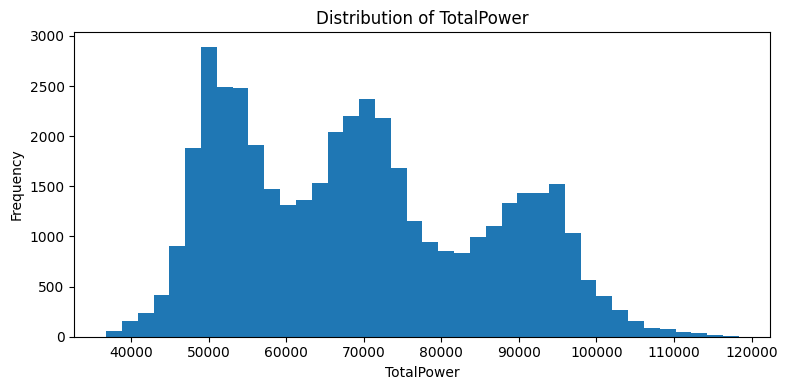

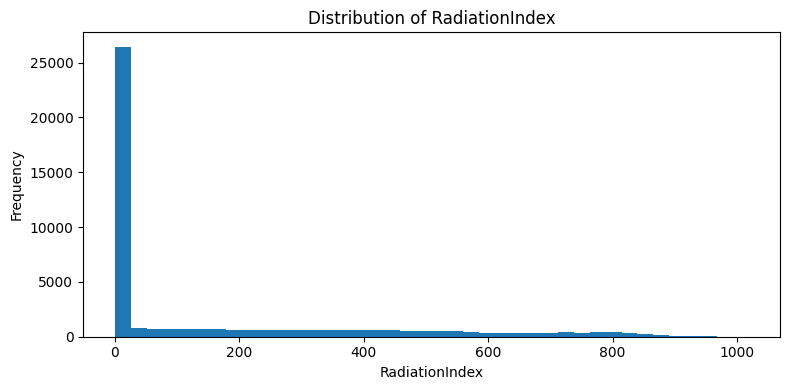

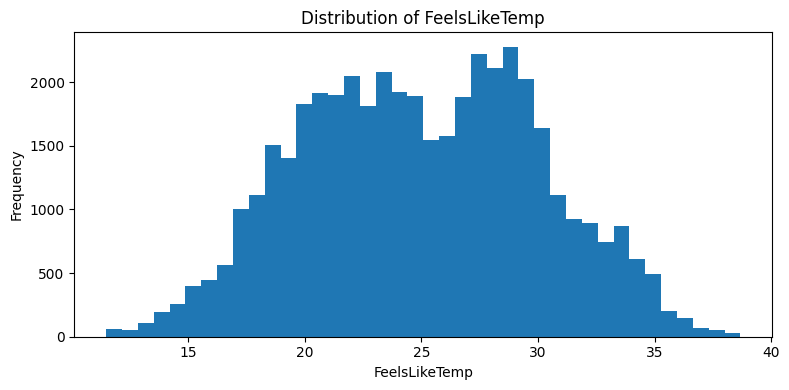

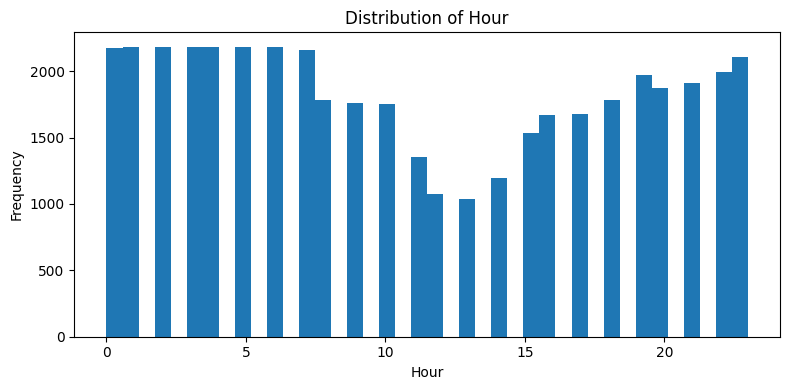

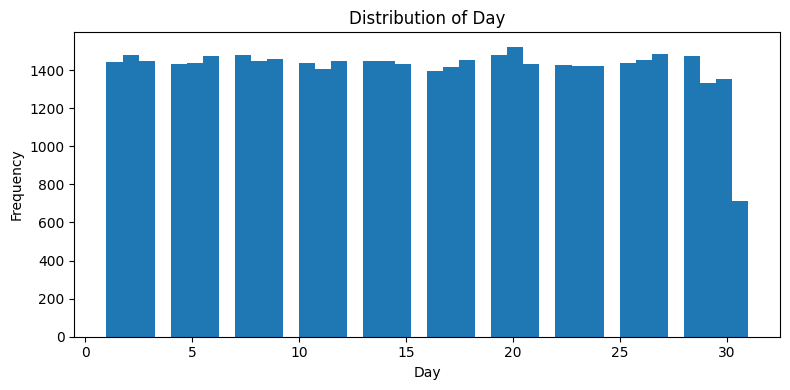

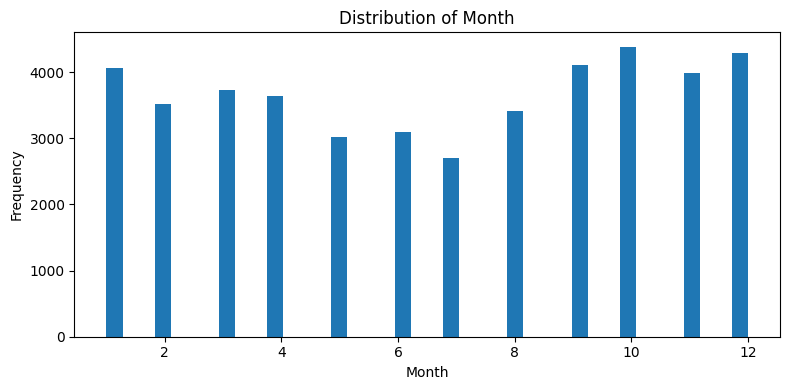

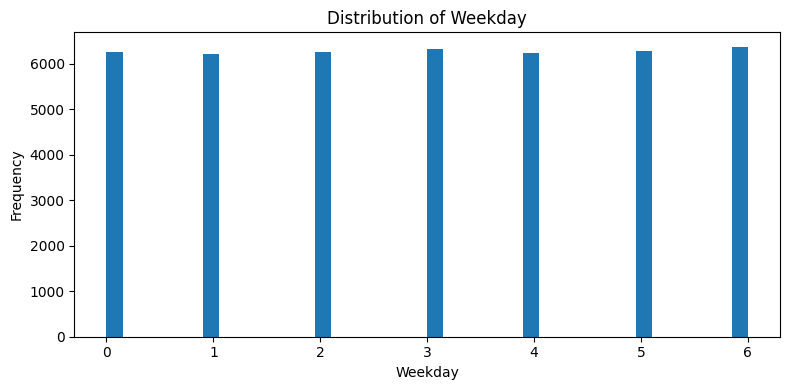

In [ ]:
# Step 18 — Distribution Plots (Histograms)

import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = dataframe1.select_dtypes(include='number').columns.tolist()

# Create a histogram for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(dataframe1[col], bins=40)  # no custom colors as required
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"{col}_histogram.png", dpi=150)
    plt.show()


**Step 19 — Boxplots for Visual Outlier and Spread Detection**

This step uses boxplots to show the distribution and variability of each numeric feature.

**What a boxplot reveals:**

**Median (center line)**:
Shows the central value of the feature.

**Box (IQR — Interquartile Range):**
Represents the middle 50% of the data.

**Whiskers:**
Show the full spread of non-outlier values.

**Dots outside whiskers (outliers):**
Represent extreme values that may need attention.

**Why boxplots are important:**

They give a compact summary of spread, skewness, and outliers.

They help validate if the dataset cleaning was effective.

They visually show which features have high variability.

They reveal if power consumption or weather features have unstable readings.

Each boxplot is saved automatically as a PNG file for project documentation.

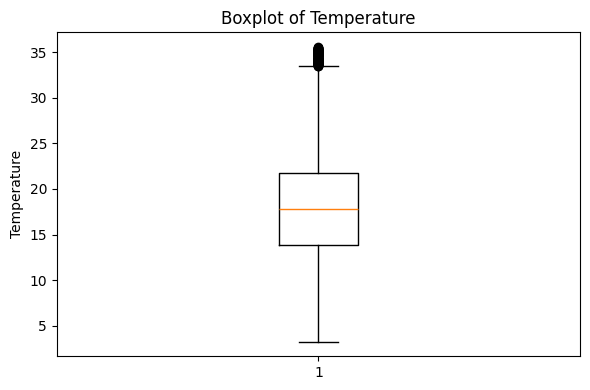

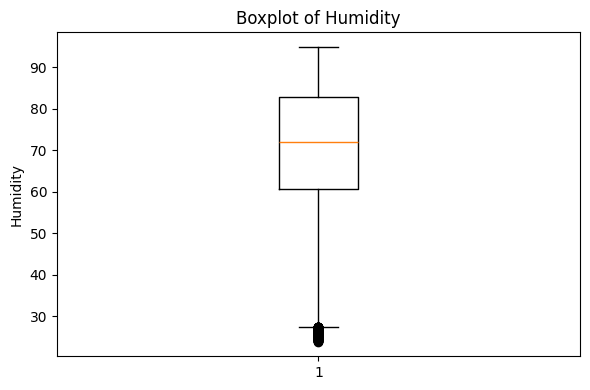

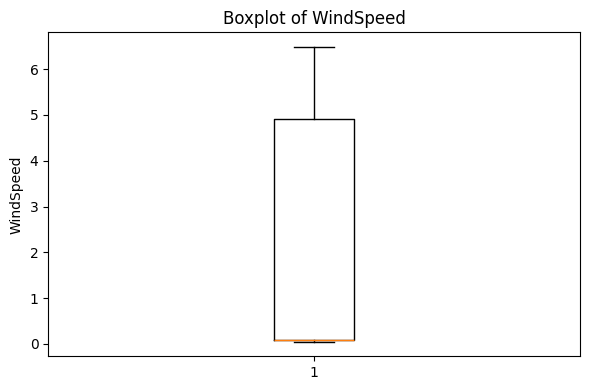

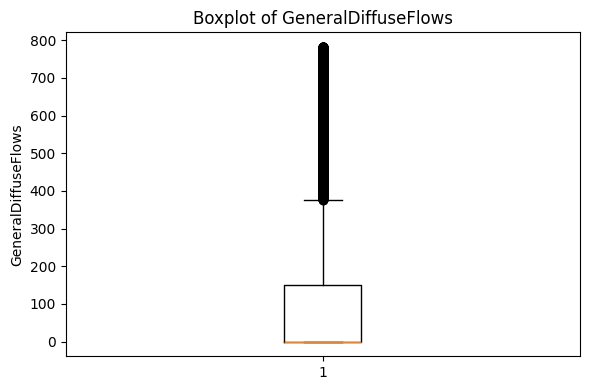

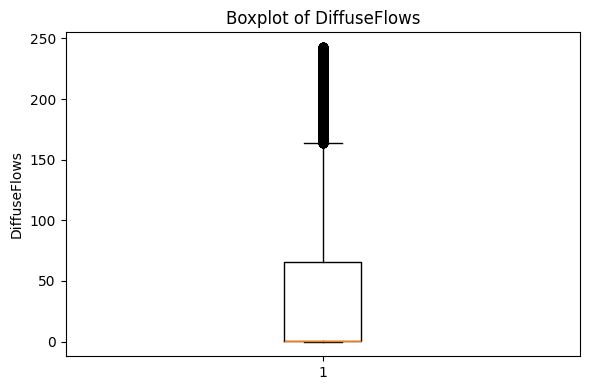

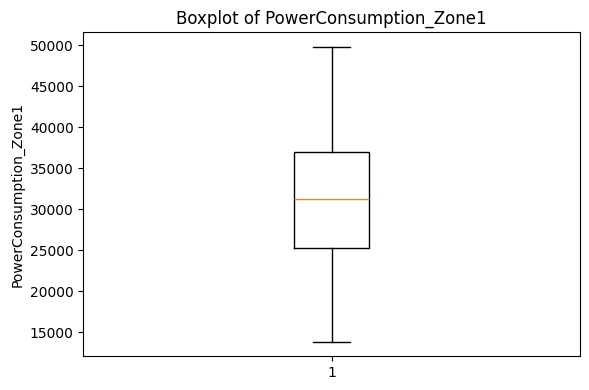

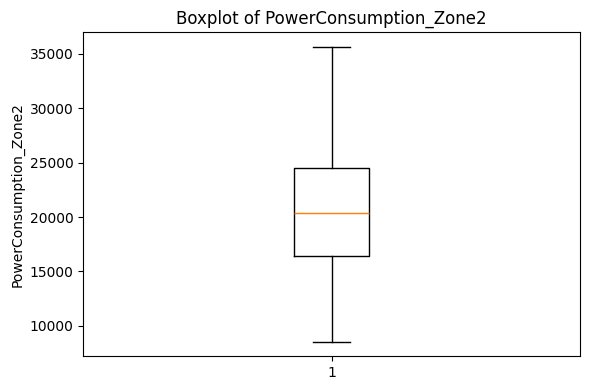

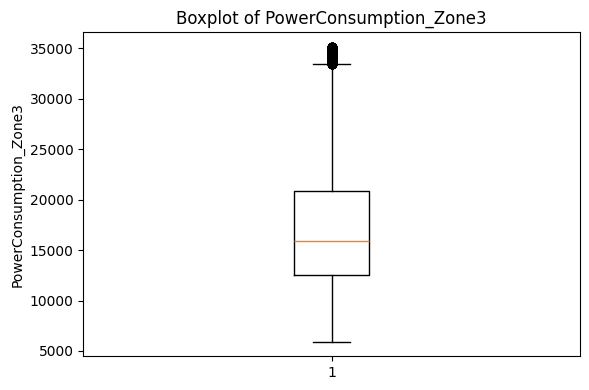

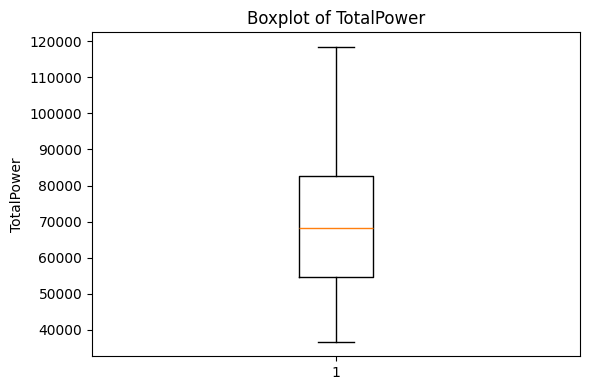

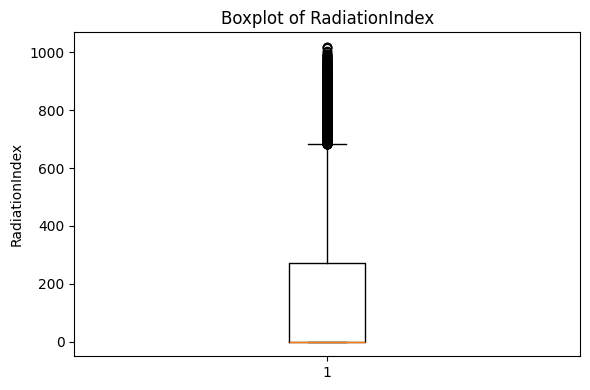

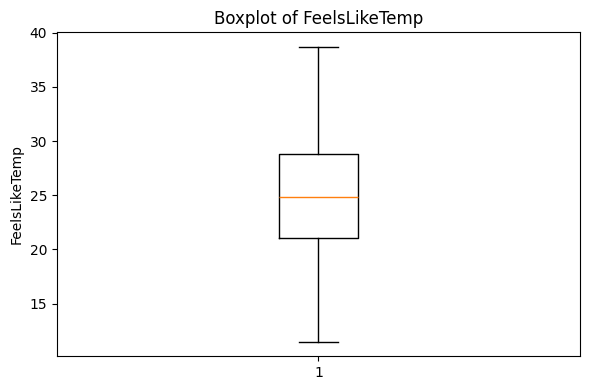

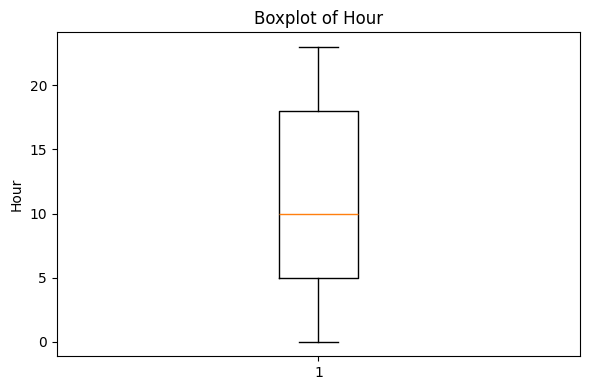

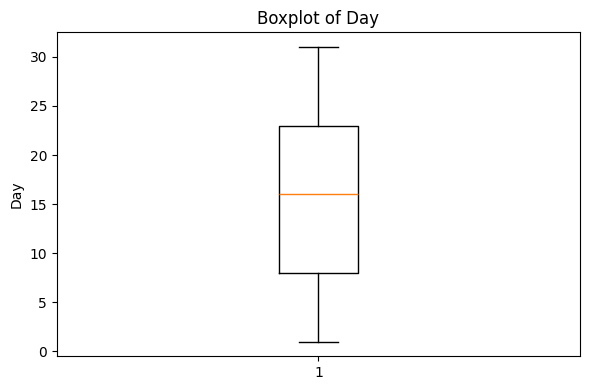

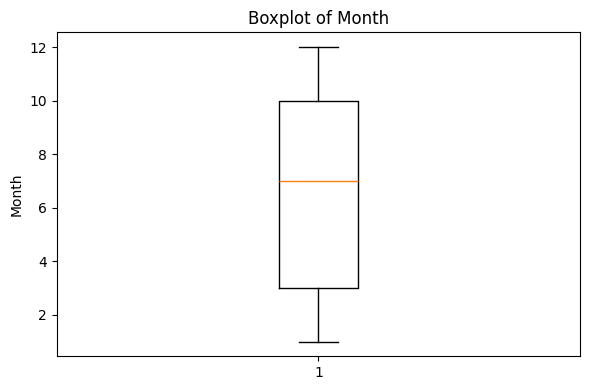

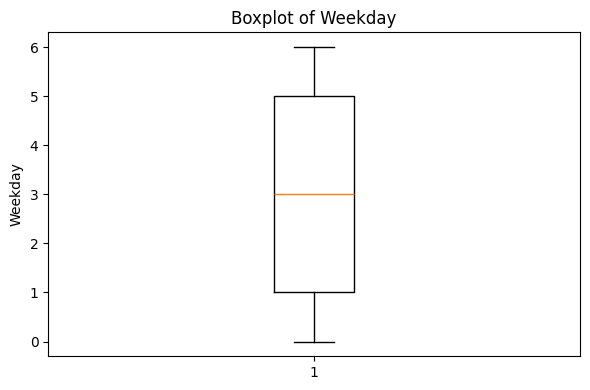

In [ ]:
# Step 19 — Boxplots for each numeric feature

import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = dataframe1.select_dtypes(include='number').columns.tolist()

# Create a boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(dataframe1[col], vert=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_boxplot.png", dpi=150)
    plt.show()


**Step 20 — Scatter Plots (Weather vs Power Consumption)**

This step visualizes how weather conditions influence power usage in different zones. Scatter plots show the relationship between two variables on an** X–Y **scale.

**What these scatter plots reveal:**

**Temperature vs Power**
Shows whether hotter days increase cooling/AC load.

**Humidity vs Power**
High humidity often increases “comfort load” and indoor cooling demand.

**Wind Speed vs Power**
Helps understand cooling effects and heat dissipation.

**Radiation vs Power**
Higher solar radiation may increase heat gain in buildings.

**Why this step is important:**

It visually confirms or challenges the numeric correlations found in Step 17.

It helps identify predictive patterns (useful if you later do forecasting).

It creates a strong analytical foundation for your final report.

Saved PNG files can be used directly in your PPT or portfolio.

All plots are saved automatically with descriptive filenames like:
**Temperature_vs_TotalPower_scatter.png.**

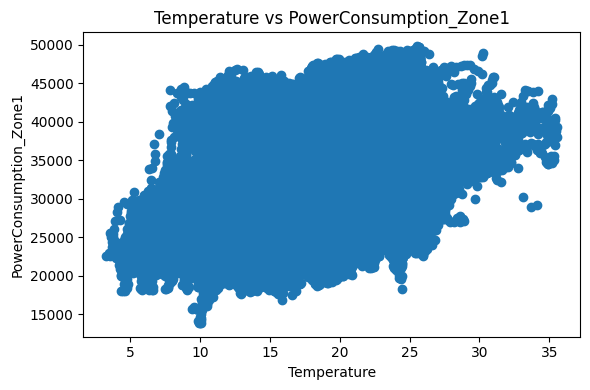

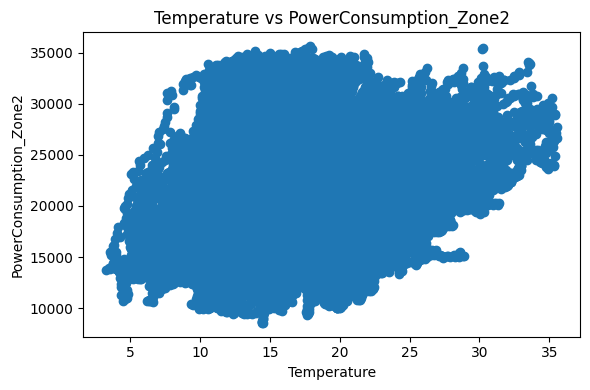

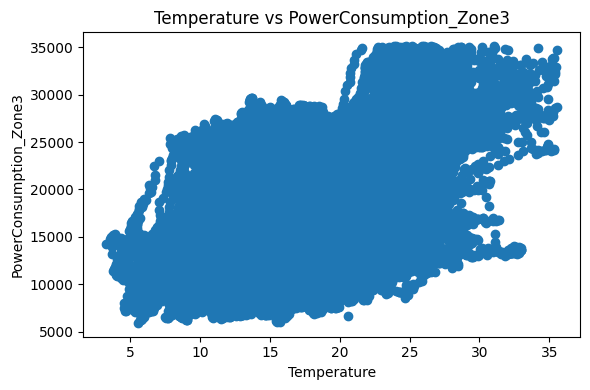

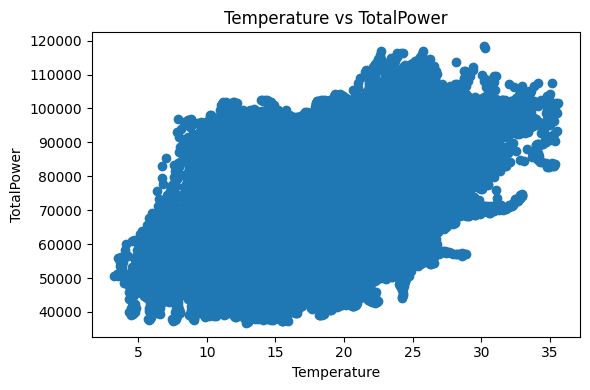

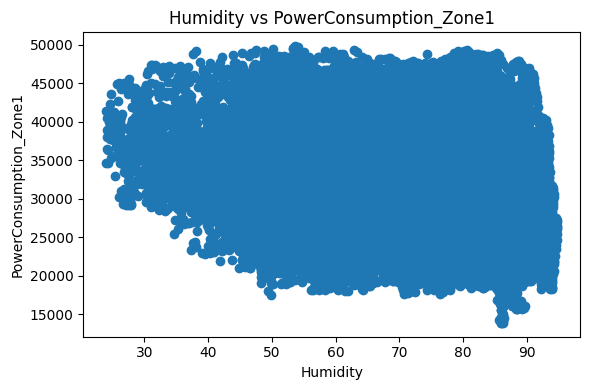

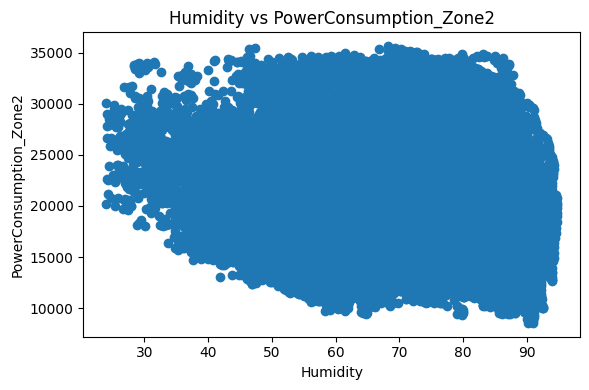

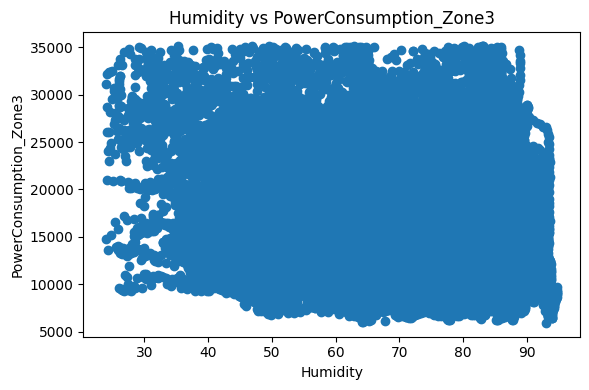

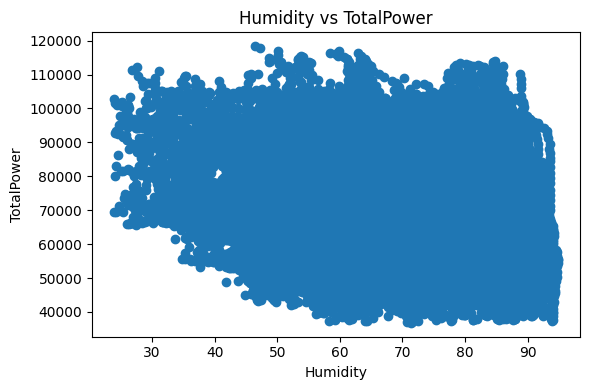

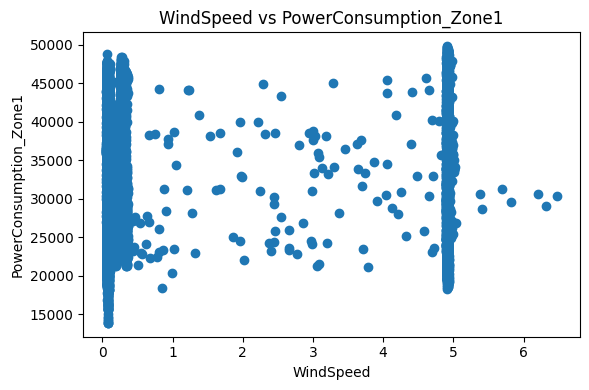

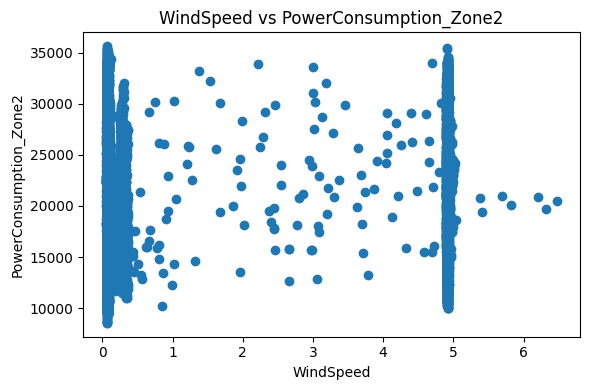

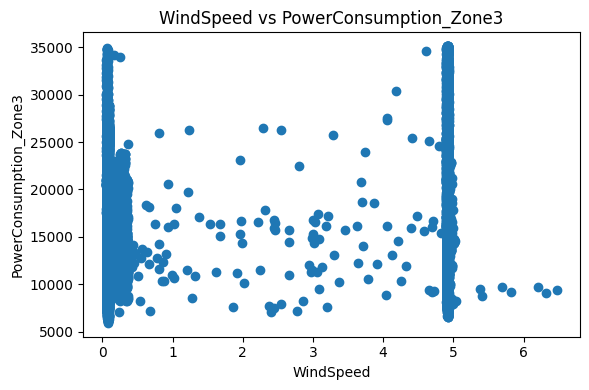

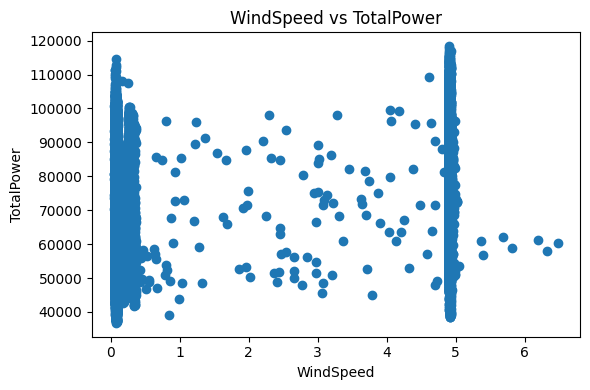

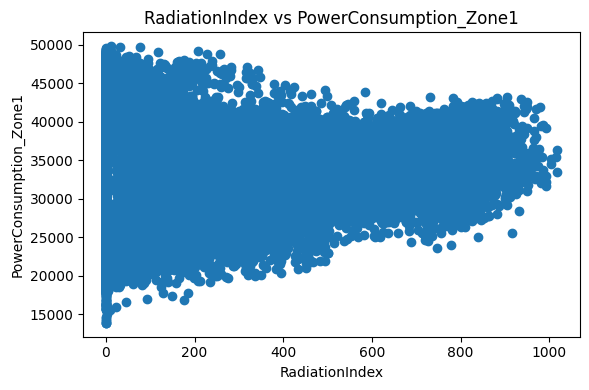

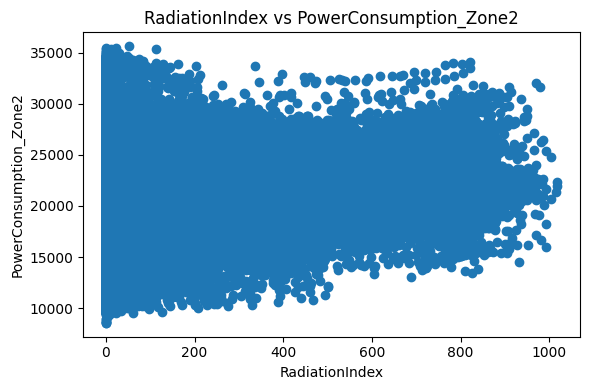

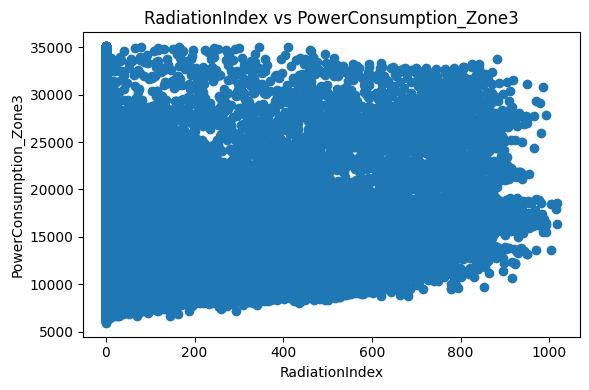

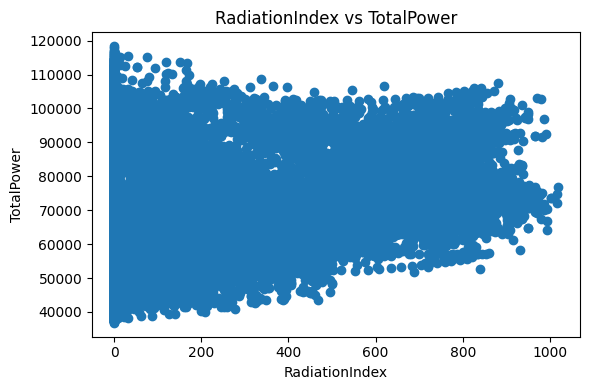

In [ ]:
# Step 20 — Scatter Plots: Weather vs Power Consumption

import matplotlib.pyplot as plt

# Select weather columns
weather_cols = ['Temperature', 'Humidity', 'WindSpeed', 'RadiationIndex']  # adjust if names differ

# Select power columns
power_cols = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2',
              'PowerConsumption_Zone3', 'TotalPower']  # created earlier

# Generate scatter plots
for w in weather_cols:
    if w not in dataframe1.columns:
        continue
    for p in power_cols:
        if p not in dataframe1.columns:
            continue

        plt.figure(figsize=(6, 4))
        plt.scatter(dataframe1[w], dataframe1[p])  # default color used
        plt.title(f"{w} vs {p}")
        plt.xlabel(w)
        plt.ylabel(p)
        plt.tight_layout()
        plt.savefig(f"{w}_vs_{p}_scatter.png", dpi=150)
        plt.show()


**Step 21 — Pair Plot Style Grid (Multi-Relation Visualization**)

This step creates a scatter-matrix grid that shows pairwise relationships among multiple numerical features at the same time. It is similar to a “pair plot” but built using Matplotlib via pandas.plotting.scatter_matrix, since seaborn is not allowed.

**What it shows:**

How strongly two features are related (positive, negative, or none).

Whether the relationship is linear, non-linear, or random.

Presence of clusters or patterns in power-weather data.

Outliers that appear as isolated points far from the main cloud.

Feature distributions using the histogram shown along the diagonal.

**Why it is useful:**

Helps understand complex interactions between temperature, humidity, radiation, and power usage.

Gives a complete overview of trends that are not visible in single scatter plots.

Helps identify which features may be important for deeper analysis or prediction tasks.

Strengthens the analytical depth of the project by showing multi-variable relationships in one visual grid.

**How it works:**

Only numerical columns are selected so the matrix remains clean and error-free.

If there are too many numeric columns, a limited number are used to keep the grid readable.

If the dataset is very large, a sample is taken to avoid slow plotting.

The matrix is generated using Matplotlib, ensuring compatibility with your project requirements.

This visualization provides a compact but powerful overview of how different features interact, making it a key part of exploratory data analysis.

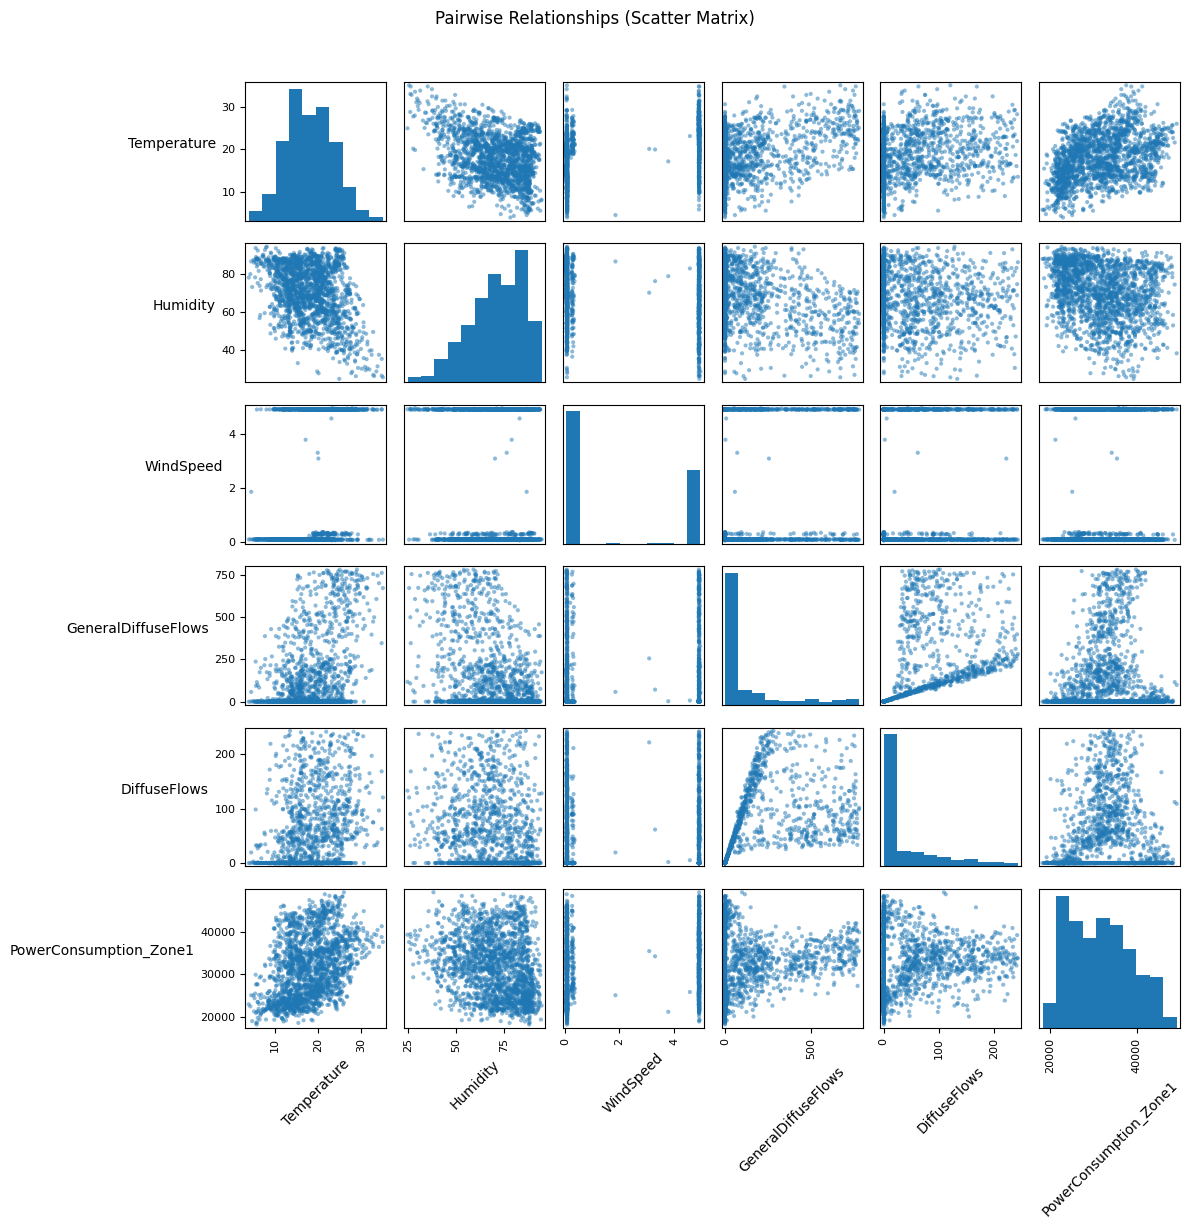

In [ ]:
# Step 21 — Pair Plot Style Grid (Scatter Matrix) using Matplotlib (no seaborn)

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 1) Select numeric columns only
numeric_cols = dataframe1.select_dtypes(include="number").columns.tolist()

# Safety guard: if there are too many numeric columns, keep the first 6 to avoid a cluttered grid
max_cols = 6
use_cols = numeric_cols[:max_cols]

if len(use_cols) == 0:
    raise ValueError("No numeric columns found for the scatter matrix. Please check your dataframe.")

# 2) (Optional) sample to speed up plotting for very large datasets
plot_df = dataframe1[use_cols]
max_points = 2000
if len(plot_df) > max_points:
    plot_df = plot_df.sample(max_points, random_state=42)

# 3) Plot scatter matrix
axes = scatter_matrix(
    plot_df,
    figsize=(12, 12),
    diagonal="hist",
    alpha=0.5,
    range_padding=0.05
)

# 4) Neaten labels
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.suptitle("Pairwise Relationships (Scatter Matrix)", y=1.02)
plt.tight_layout()
plt.show()


**Step 22 — Time-Based Feature Analysis (Hour, Day, Month Patterns)**

This step analyzes how power consumption changes across different time segments.
Time-based analysis is important because energy usage is rarely random—it follows human habits, business cycles, and weather patterns.

**1. Hourly Pattern**

This plot shows how energy usage changes across the 24 hours of the day.
It helps identify:

Peak hours

Low-consumption hours

Operational or residential usage cycles

**2. Daily Pattern**

This shows how consumption varies across days in a month.
Useful for detecting:

Abnormal days

Repeating mid-month trends

Special events or anomalies

**3. Monthly Pattern**

This shows whether energy usage changes with seasons.
It reveals:

Hot months with higher cooling loads

Cold months with higher heating loads

Seasonal behavior of weather and energy demand

**Why this step is important:**

It reveals clear behavioral and seasonal patterns.

Helps justify consumption peaks in your report.

Supports forecasting and anomaly detection.

Makes your project analysis more complete and professional.

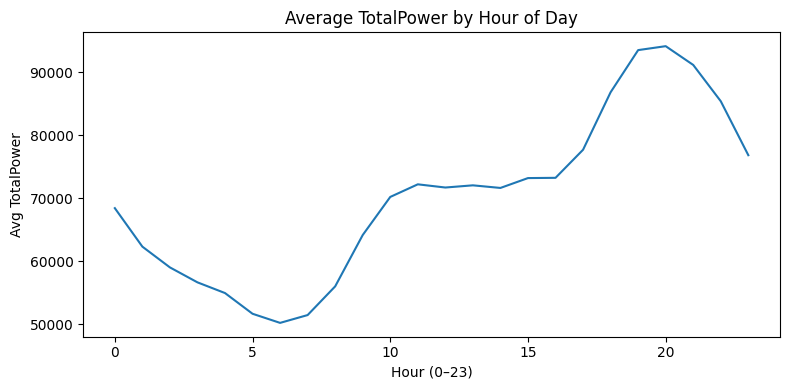

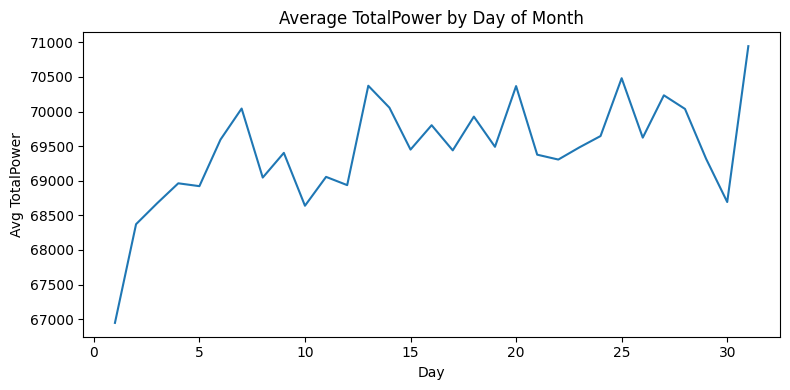

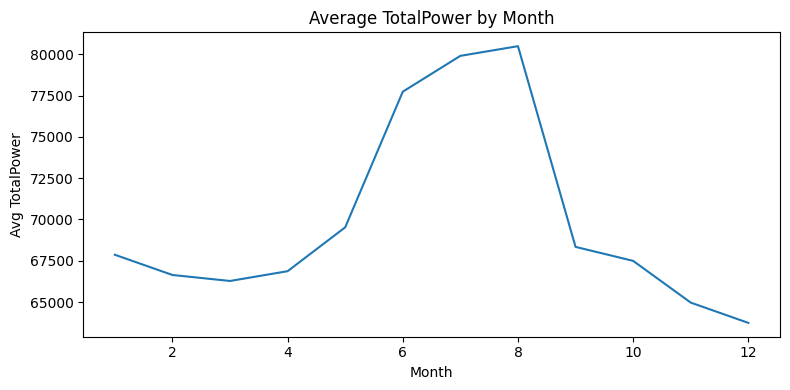

In [ ]:
# Step 22 — Time-Based Feature Analysis (Hour, Day, Month Patterns)

import matplotlib.pyplot as plt

# Ensure datetime index exists
if 'Hour' not in dataframe1.columns:
    dataframe1['Hour'] = dataframe1.index.hour
if 'Day' not in dataframe1.columns:
    dataframe1['Day'] = dataframe1.index.day
if 'Month' not in dataframe1.columns:
    dataframe1['Month'] = dataframe1.index.month

# Choose the main target column for analysis
# If TotalPower exists, use it. Else use first numeric column.
if 'TotalPower' in dataframe1.columns:
    target_col = 'TotalPower'
else:
    target_col = dataframe1.select_dtypes('number').columns[0]

# Hourly Pattern
plt.figure(figsize=(8,4))
dataframe1.groupby('Hour')[target_col].mean().plot()
plt.title(f"Average {target_col} by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel(f"Avg {target_col}")
plt.tight_layout()
plt.savefig("hourly_pattern.png", dpi=150)
plt.show()

# Daily Pattern
plt.figure(figsize=(8,4))
dataframe1.groupby('Day')[target_col].mean().plot()
plt.title(f"Average {target_col} by Day of Month")
plt.xlabel("Day")
plt.ylabel(f"Avg {target_col}")
plt.tight_layout()
plt.savefig("daily_pattern.png", dpi=150)
plt.show()

# Monthly Pattern
plt.figure(figsize=(8,4))
dataframe1.groupby('Month')[target_col].mean().plot()
plt.title(f"Average {target_col} by Month")
plt.xlabel("Month")
plt.ylabel(f"Avg {target_col}")
plt.tight_layout()
plt.savefig("monthly_pattern.png", dpi=150)
plt.show()
